In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
import scipy

cmap = mpl.cm.jet

In [6]:
PATH = "electromigration_8/GBN_ET2_"
N_RANGE = (508, 569)
file_list = lambda nrange : [PATH + '{0:03}.dat'.format(i) for i in range(*nrange)]

In [160]:
def file2df(file):
    with open(file,'r') as f:
        for i in range(70): # 70 for .dat, 8 for transport__.dat
            f.readline()
        df = pd.read_table(f)
        df = df.rename(columns={"Bias calc (V)": "V", "LI Y [AVG] (V)": "LIY"})
        return df
df = file2df(file_list(N_RANGE)[0])
df.head()

V  Current [AVG] (A)  LI X [AVG] (V)       LIY  Current [00001] (A)  \
0  0.500000       9.607120e-12        0.365638  0.099123         7.596620e-12   
1  0.498043       9.617840e-12        0.365944  0.096760         7.466410e-12   
2  0.496086       9.495370e-12        0.365186  0.098180         7.370150e-12   
3  0.494129       9.364950e-12        0.365100  0.095731         7.307500e-12   
4  0.492172       9.355310e-12        0.365449  0.093610         7.238430e-12   

   LI X [00001] (V)  LI Y [00001] (V)  Current [00002] (A)  LI X [00002] (V)  \
0          0.365328          0.074686         1.072930e-11          0.364915   
1          0.365759          0.075217         1.069930e-11          0.365585   
2          0.367577          0.073706         1.056960e-11          0.364097   
3          0.364835          0.073446         1.038120e-11          0.364379   
4          0.367394          0.071833         1.044350e-11          0.363512   

   LI Y [00002] (V)  Current [00003] (A)  LI X [00003] (V)  LI Y [00003] (V)  
0          0.113174         1.049550e-11          0.366672          0.109509  
1          0.107799         1.068780e-11          0.366489          0.107262  
2          0.110826         1.054640e-11          0.363885          0.110007  
3          0.104841         1.040620e-11          0.366087          0.108906  
4          0.103637         1.038410e-11          0.365440          0.105360

In [12]:
from scipy.signal import fftconvolve, gaussian

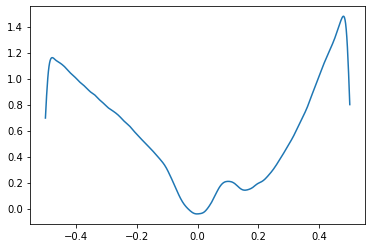

In [36]:
plt.plot(df.V, fftconvolve(df.LIY, gaussian(30, std=5), mode='same'))

In [14]:
a = fftconvolve(df.LIY, gaussian(50, std=9), mode='same')
df[np.r_[True, a[1:] < a[:-1]] & np.r_[a[:-1] < a[1:], True]]

V  Current [AVG] (A)  LI X [AVG] (V)       LIY  \
0    0.500000       9.395400e-12        0.366443  0.128989   
175  0.157534       6.987960e-13        0.366059  0.010691   
255  0.000978      -1.676860e-13        0.366409 -0.003704   
511 -0.500000      -1.246690e-11        0.364323  0.097729   

     Current [00001] (A)  LI X [00001] (V)  LI Y [00001] (V)  \
0           6.330290e-12          0.365559          0.087563   
175         4.036430e-13          0.368387          0.007219   
255        -1.560910e-13          0.364513         -0.003761   
511        -8.396990e-12          0.361612          0.069219   

     Current [00002] (A)  LI X [00002] (V)  LI Y [00002] (V)  \
0           1.076370e-11          0.367052          0.151855   
175         8.473880e-13          0.366093          0.013838   
255        -1.736760e-13          0.366493         -0.004715   
511        -1.449240e-11          0.367486          0.111282   

     Current [00003] (A)  LI X [00003] (V)  LI Y [00003] (V)  
0           1.109230e-11          0.366718          0.147548  
175         8.453560e-13          0.363697          0.011015  
255        -1.732910e-13          0.368220         -0.002635  
511        -1.451130e-11          0.363870          0.112686

In [15]:
df.V.diff()

0           NaN
1     -0.001957
2     -0.001957
3     -0.001957
4     -0.001957
         ...   
507   -0.001957
508   -0.001957
509   -0.001957
510   -0.001957
511   -0.001957
Name: V, Length: 512, dtype: float64

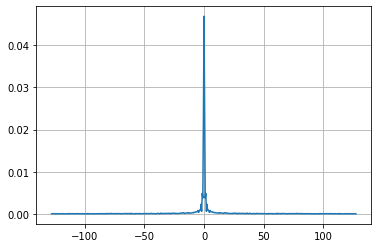

In [16]:
import scipy.fftpack as fft
x = df.V
y = df.LIY
yf = fft.fft(y)
xf = fft.fftfreq(df.V.size, 0.003913)
xf = np.fft.fftshift(xf)
yplot = np.fft.fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/df.V.size * np.abs(yplot))
plt.grid()
plt.show()

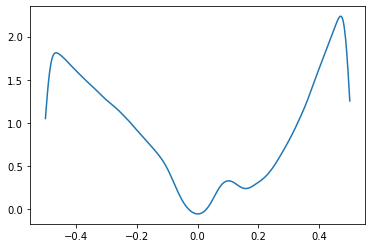

In [17]:
smoothed = fftconvolve(df.LIY, gaussian(50, std=8), mode='same')
plt.plot(df.V, smoothed)

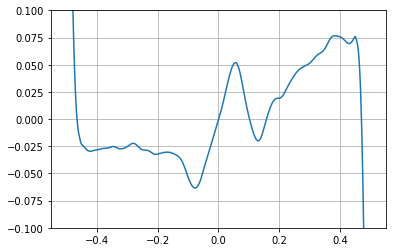

In [18]:
plt.plot(df.V, fftconvolve(smoothed, [-1/2, -1, 0, 1, 1/2], mode='same'))
plt.ylim(-0.1, 0.1)
plt.grid(True)

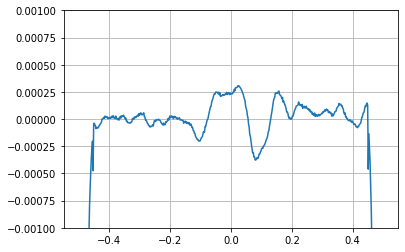

In [19]:
sec_deriv = fftconvolve(smoothed, [1/2, -1, 1/2], mode='same')
smooth_sec = fftconvolve(sec_deriv, gaussian(50, std=1), mode='same')
plt.plot(df.V, sec_deriv)
plt.ylim(-0.001, 0.001)
plt.grid(True)

In [20]:
def find_min_deriv(df, guess=0.3, sig=5, phon_correct=False):
    smoothed = fftconvolve(df.LIY, gaussian(50, std=8), mode='same')
    deriv = fftconvolve(smoothed, [-1, 0, 1], mode='same')

In [48]:
def find_min(df, guess=0.3, sig=5, phon_correct=False):
    a = fftconvolve(df.LIY, gaussian(50, std=sig), mode='same')
    tmp = df
    m = tmp.iloc[(tmp['V']-guess).abs().argsort()[:1]].V.values[0]
    plt.figure()
    plt.plot(df.V, a)
    plt.axvline(m)
    if m < 0 and phon_correct:
        return m + 0.06
    else:
        return m - 0.06

In [157]:
def inverted_gaussian(x, a, c, var, d, e):
    return d - a * np.exp(-(x-c)**2 / (2*var)) + e*x

[1.15303415 2.74714803 0.06766503 0.0080398  0.02491013]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


2.7471480306565135

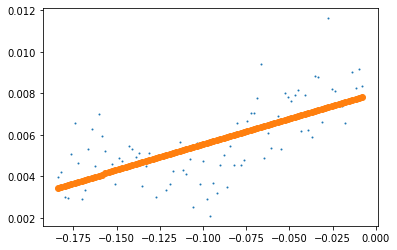

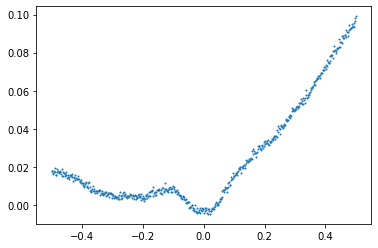

In [161]:
from scipy.optimize import curve_fit

def fit_dirac(df, crop=(-0.1, 0.1), fit_window=(-0.09, 0.09), right=True, fname=None):
    """
    Fits diract point using 4 step process
    1.) crop out phonon gap (set by crop parameter) and merge at center of crop
    2.) fit data to parabola on fit_interval
    3.) add back shift from data crop
    4.) subtract out real phonon gap (0.06V)
    
    Plots fits vs. real data as side effect
    """
    ##fit log of LIY data
    #df.LIY=np.log(np.abs(df.LIY)) + 10
    #df.LIY=np.log(np.abs(df.LIY))/np.max(df.LIY)

    V_left = df[df.V < crop[0]].V
    V_right = df[df.V > crop[1]].V
    LIY_left = df[df.V < crop[0]].LIY
    LIY_right = df[df.V > crop[1]].LIY
    if right:
        V_left = V_left - np.max(V_left)
        crop_shift = np.min(V_right)
        V_right = V_right - crop_shift
    else:
        crop_shift = np.max(V_left)
        V_left = V_left - crop_shift
        V_right = V_right - np.min(V_right)
    V_cropped = pd.concat([V_left, V_right])
    LIY_cropped = pd.concat([LIY_left, LIY_right])
    LIY_cropped = LIY_cropped
    V_cropped = V_cropped[~LIY_cropped.isna()]
    LIY_cropped = LIY_cropped[~LIY_cropped.isna()]
    V_min = V_cropped.loc[LIY_cropped.idxmin()]
    fit_interval = (V_cropped < V_min + fit_window[1]) & (V_cropped > V_min + fit_window[0])
    V_fit, LIY_fit = V_cropped[fit_interval], LIY_cropped[fit_interval]
    plt.figure()
    if fname:
        plt.title(fname)
    plt.plot(V_fit, LIY_fit, 'o', markersize=1)
    
    init_vals = [0.05, 0.2, 0.01, 0.1, 0] #a,c,var,d, e
    fit_parms, covar = curve_fit(inverted_gaussian, V_fit, LIY_fit, p0=init_vals)
    print(fit_parms)
    #fit_parms = np.polyfit(V_fit, LIY_fit, 2)
    #a, b, c = fit_parms
    #h = -b / (2 * a)
    #k = c - b**2 / (4 * a)
    a, c, var, d, e = fit_parms
    plt.plot(V_fit, inverted_gaussian(V_fit,a,c,var,d,e), 'o')
    #h += crop_shift
    plt.figure()
    #plt.plot(df.V, a * (df.V - h) ** 2 + k)
    plt.plot(df.V, df.LIY, 'o', markersize=1)
    #plt.xlim(-0.3, 0.5)
    #plt.ylim(-0.05, 0.1)
    return c
    #if right:
    #    return h - 0.06
    #else:
    #    return h + 0.06
#     return h - 0.06
df = file2df(file_list(N_RANGE)[0])
fit_dirac(df)

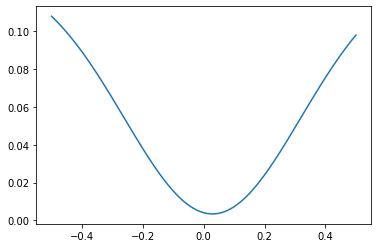

In [67]:
plt.plot(df.V,inverted_gaussian(df.V,0.12907031, 0.02872945, 0.08418323, 0.13252125))

[0.04079097 0.0698788  0.00766964 0.0520167 ]
[0.05076687 0.0770076  0.00952064 0.06658791]
[0.05420684 0.08119003 0.01104077 0.07132342]
[0.10495354 0.08513228 0.0272157  0.12413406]
[0.27608993 0.08855367 0.08577412 0.29681517]
[1.43431902e+02 9.08716554e-02 4.85863283e+01 1.43453363e+02]
[3.40408675e+02 9.68325425e-02 1.16362941e+02 3.40430810e+02]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[3.22739209e+02 9.82076702e-02 1.17225775e+02 3.22761954e+02]
[2.83603667e+02 1.01296360e-01 1.10389706e+02 2.83627600e+02]
[-0.04138995  0.11226842 -0.01733299 -0.01899543]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[-0.08072661  0.11231062 -0.02598442 -0.06081318]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[5.94894394e+02 1.04553009e-01 1.65626445e+02 5.94913272e+02]
[2.96117991e+02 1.02774744e-01 9.85843204e+01 2.96138873e+02]
[6.06193162e+02 1.06074777e-01 1.87302698e+02 6.06213809e+02]
[4.39445484e+02 1.07944544e-01 1.23399634e+02 4.39464177e+02]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[9.66059848e+02 1.06969521e-01 2.57928323e+02 9.66078422e+02]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[3.08924805e+02 1.04964989e-01 8.84702025e+01 3.08945044e+02]
[1.50512815e+03 1.05057668e-01 4.05499710e+02 1.50514853e+03]
[4.45596955e+02 1.09612095e-01 1.13600394e+02 4.45616484e+02]
[3.94783007e+02 1.01079556e-01 1.01146461e+02 3.94802255e+02]
[4.34558449e+02 1.03214821e-01 1.13446859e+02 4.34578448e+02]
[4.79443153e+02 1.06268857e-01 1.18715130e+02 4.79463906e+02]
[2.65513973e+02 1.06190591e-01 7.10525630e+01 2.65536286e+02]
[8.46956070e+02 1.00443121e-01 2.54437950e+02 8.46979524e+02]
[1.91019403e+02 1.04392654e-01 5.41960895e+01 1.91042788e+02]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[4.72463586e+02 1.02963834e-01 1.39946477e+02 4.72488236e+02]
[2.29453725e+02 1.05532746e-01 6.62132311e+01 2.29477988e+02]
[6.73343430e+02 1.07707103e-01 1.85747318e+02 6.73368274e+02]
[63.08032628  0.10448673 19.16173852 63.10594733]
[2.07328598 0.10365183 0.63649381 2.09948826]
[3.32226036e+02 1.06630484e-01 9.56713799e+01 3.32252635e+02]
[85.54987198  0.10530252 27.42210258 85.57808959]
[2.81965291e+02 1.09663044e-01 8.42663650e+01 2.81993627e+02]
[1.39740700e+02 1.11046513e-01 4.42156979e+01 1.39770475e+02]
[20.80445286  0.11121097  7.62714071 20.83594333]
[3.18580184e+02 1.16513507e-01 1.05576031e+02 3.18612053e+02]
[2.46632016e+02 1.20034730e-01 8.56635587e+01 2.46664641e+02]
[98.37038972  0.12056024 39.753728   98.40416337]
[2.97000307e+02 1.21952081e-01 1.36937130e+02 2.97035706e+02]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[2.58593424e+02 1.30321699e-01 1.11098234e+02 2.58629179e+02]
[108.80760056   0.12834371  55.42946738 108.84502452]
[2.89007028e+02 1.33419442e-01 1.49637931e+02 2.89045390e+02]
[83.87155794  0.13738026 47.04258426 83.91030884]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[2.49981796e+02 1.42708922e-01 1.40287016e+02 2.50021464e+02]
[30.01733722  0.14731526 16.84041198 30.05750274]
[0.27937095 0.15353039 0.15212181 0.32026476]
[0.92460475 0.15655668 0.5439977  0.96611888]
[0.1092914  0.16626751 0.05686834 0.15089937]
[0.0494795  0.17001492 0.02365085 0.09150894]
[0.04317694 0.17364795 0.02125105 0.08601043]
[0.02739781 0.17751769 0.01265684 0.07044826]
[0.01915946 0.18068843 0.00728104 0.06201975]
[0.01860298 0.18705157 0.00765046 0.06227452]
[0.01640722 0.19219619 0.00629964 0.06032582]
[0.01985788 0.19353242 0.00998213 0.06447272]
[0.01426688 0.19960158 0.00582373 0.05871203]
[0.01188177 0.2040741  0.00434038 0.05655591]
[0.01337949 0.20928435 0.00566192 0.05821264]
[0.00852833 0.21038407 0.00256335 0.05389406]
[0.00648314 0.21461491 0.00200521 0.0520611 ]
[0.01890085 0.22626655 0.01284964 0.06487953]


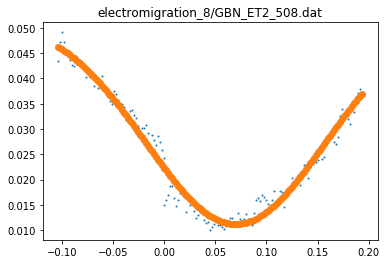

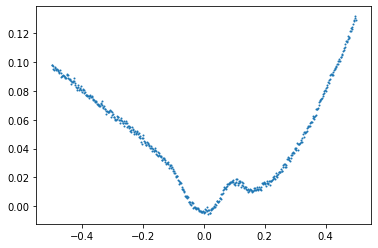

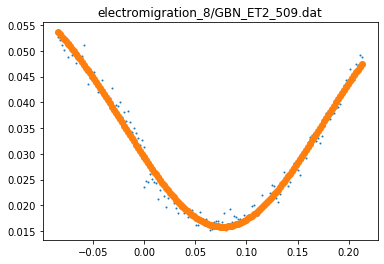

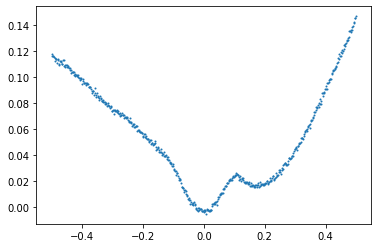

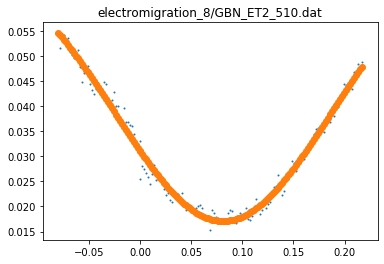

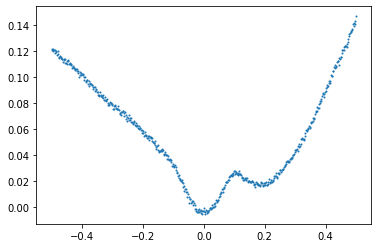

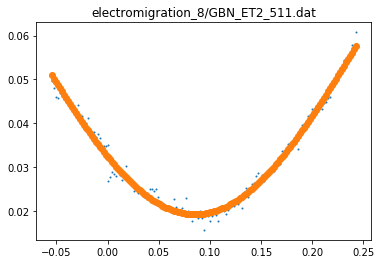

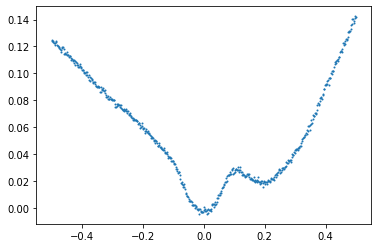

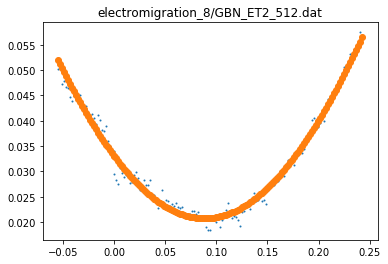

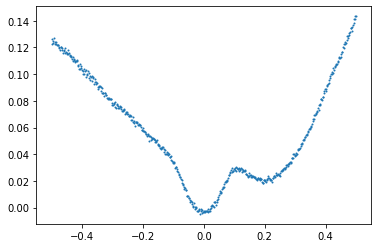

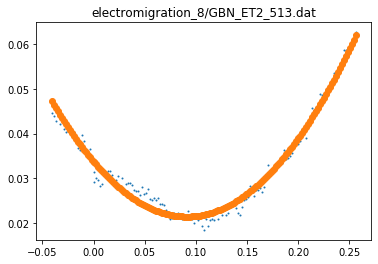

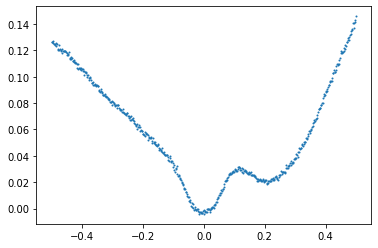

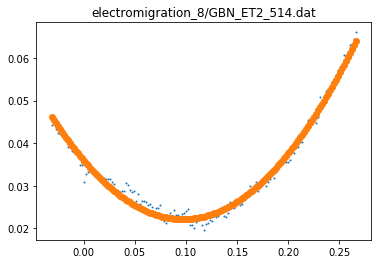

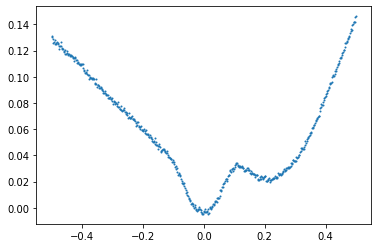

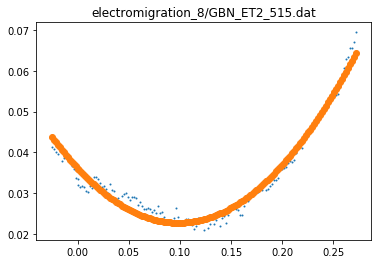

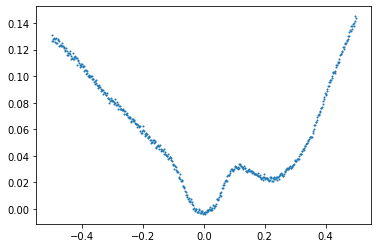

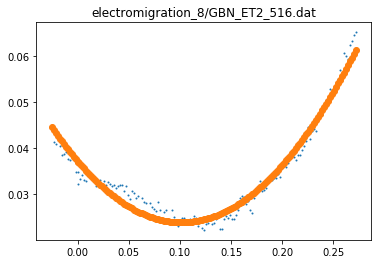

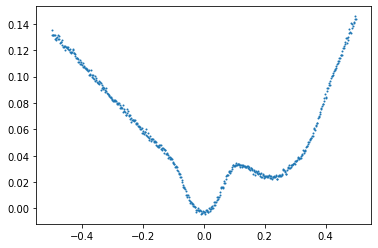

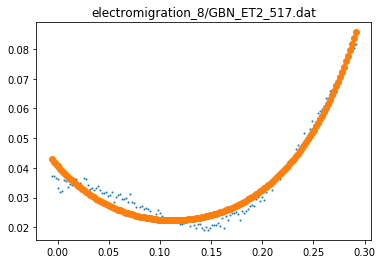

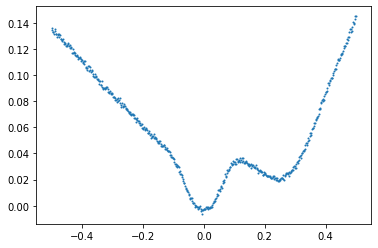

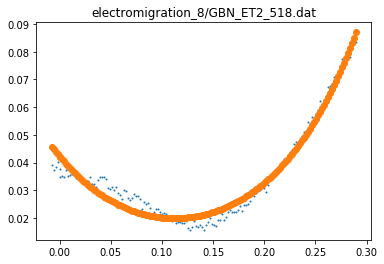

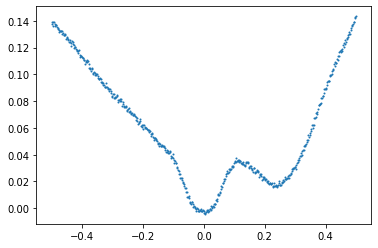

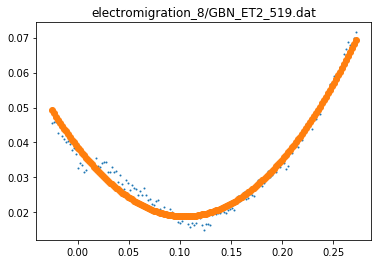

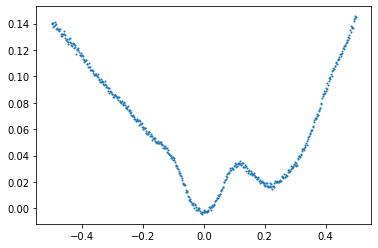

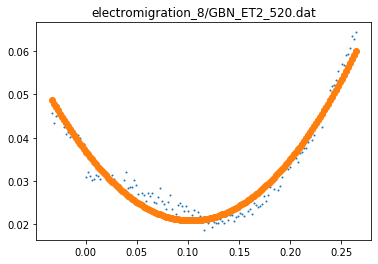

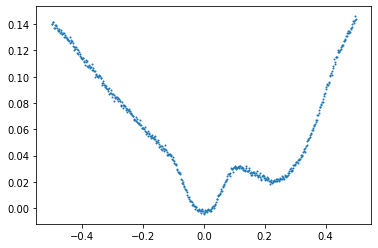

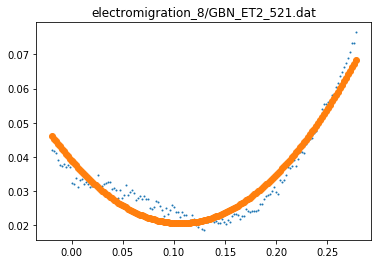

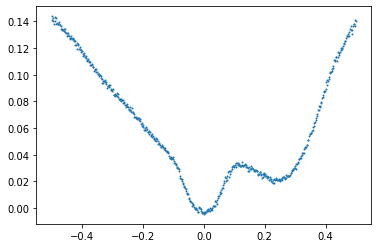

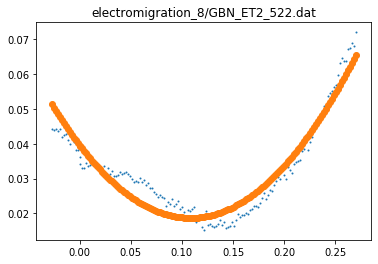

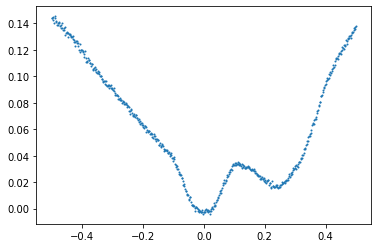

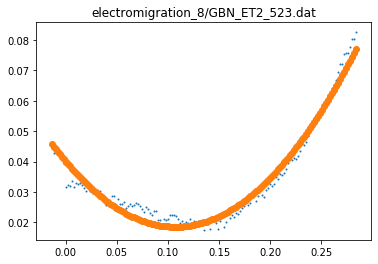

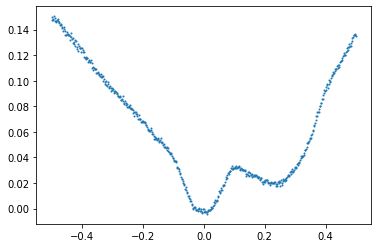

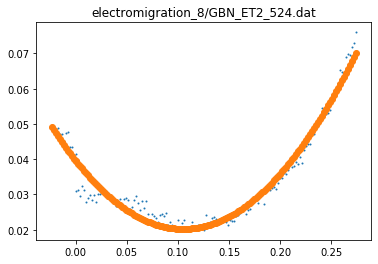

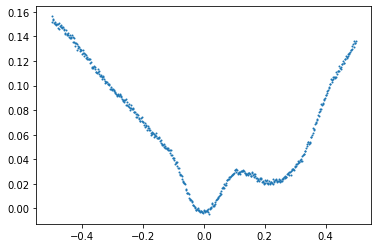

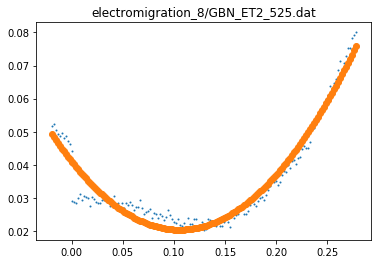

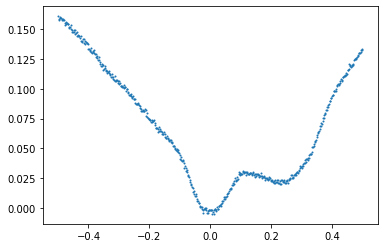

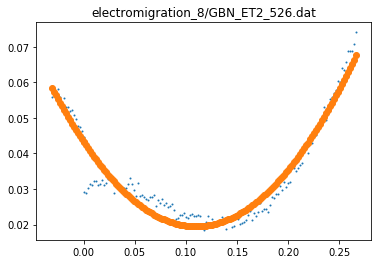

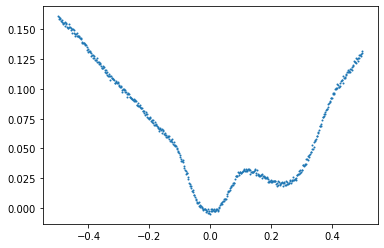

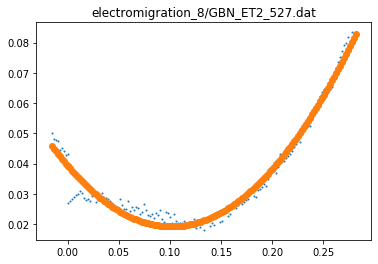

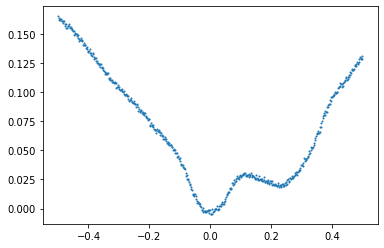

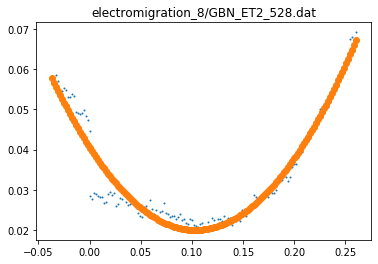

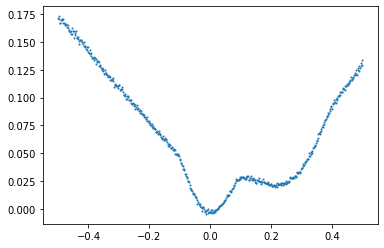

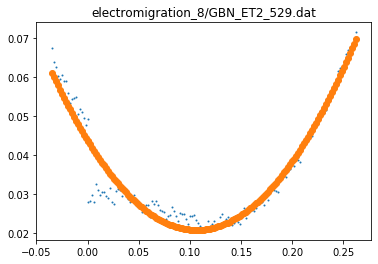

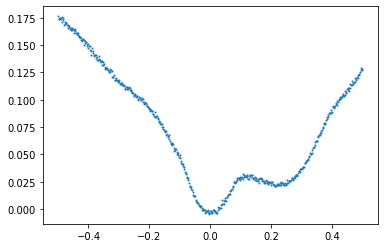

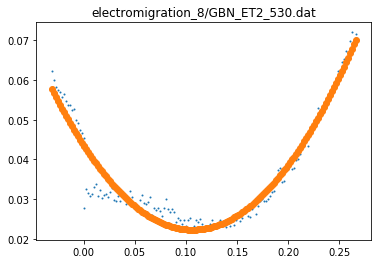

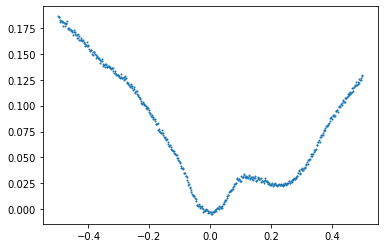

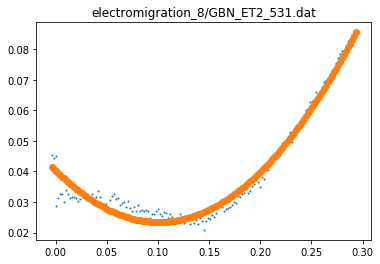

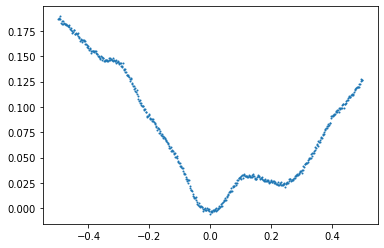

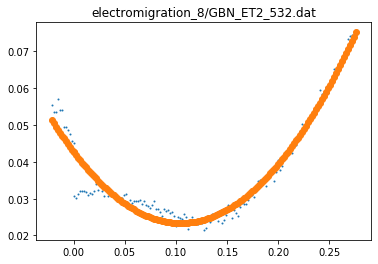

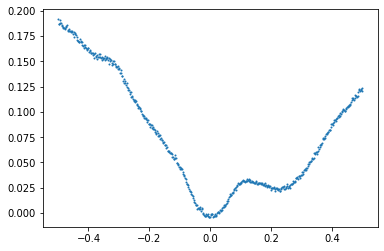

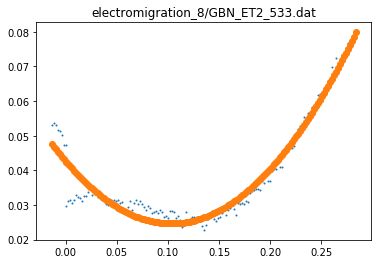

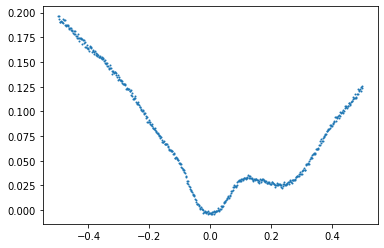

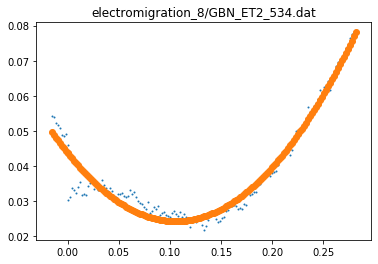

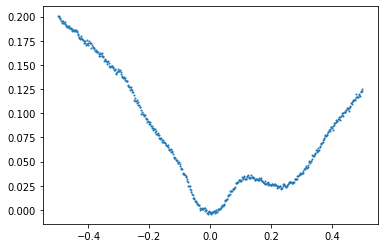

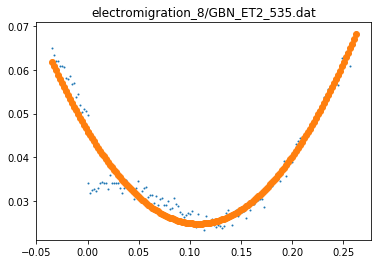

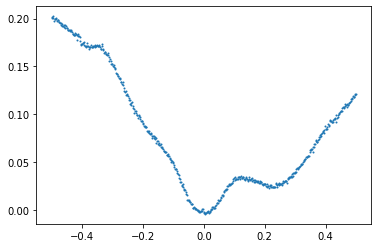

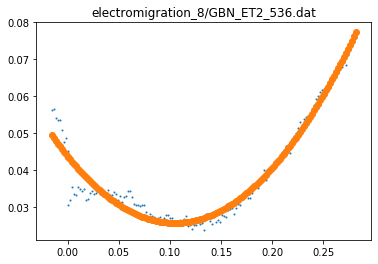

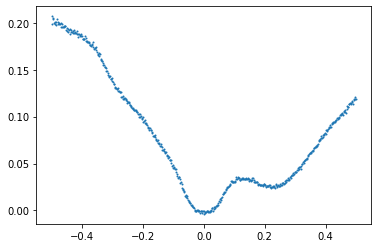

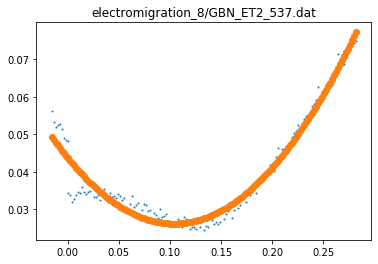

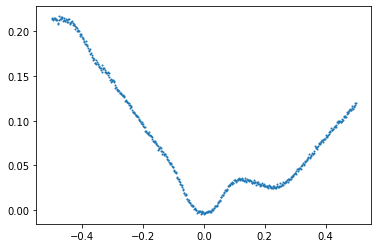

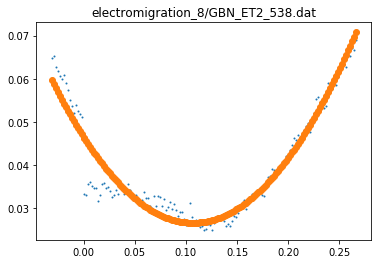

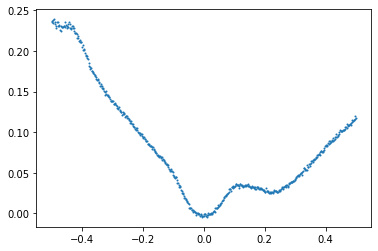

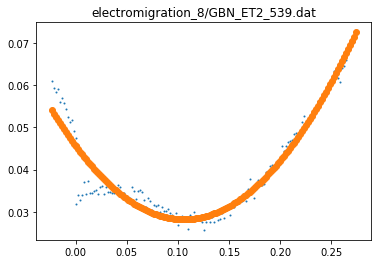

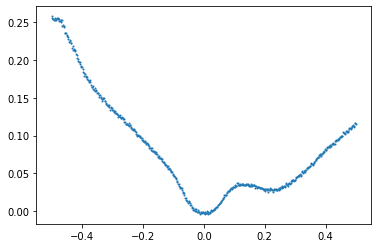

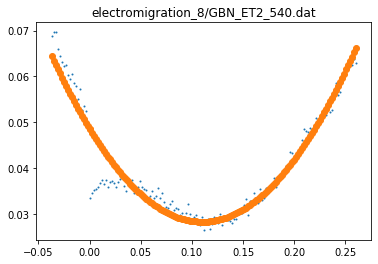

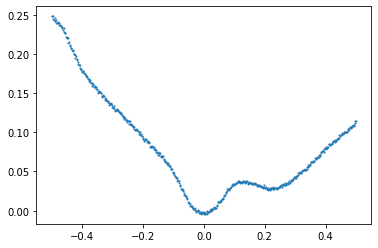

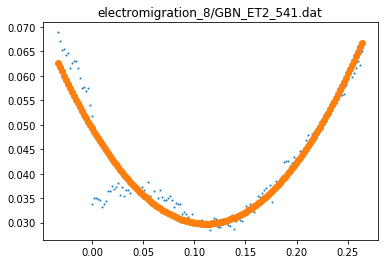

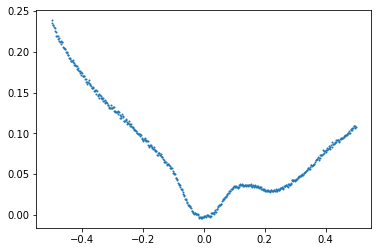

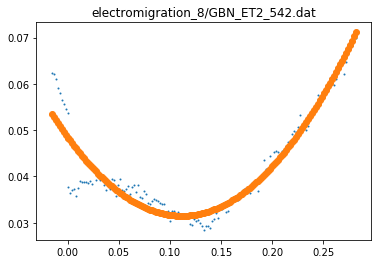

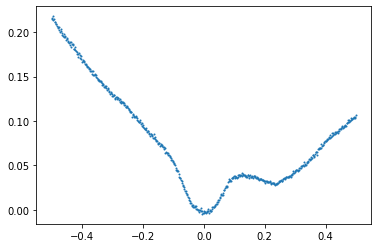

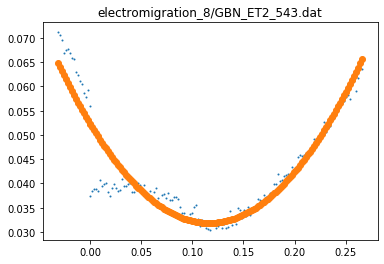

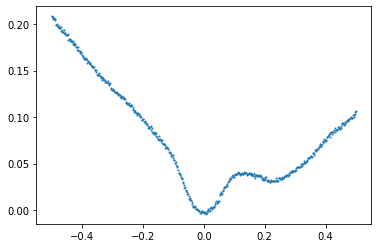

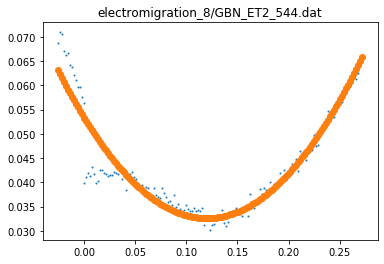

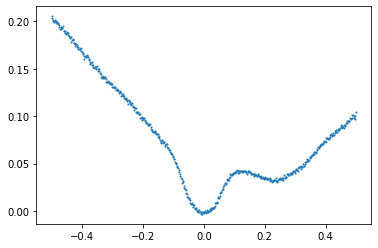

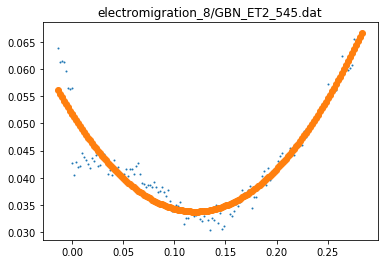

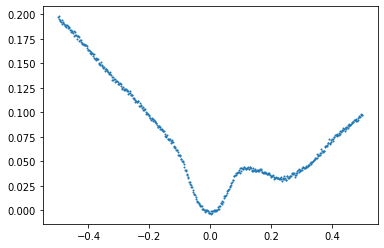

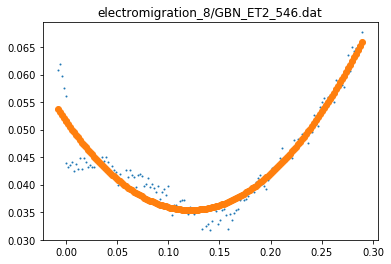

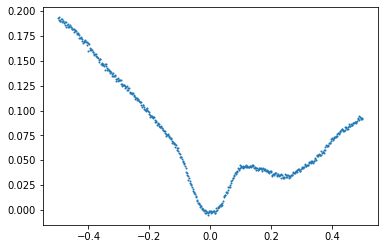

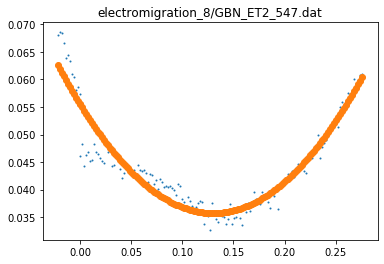

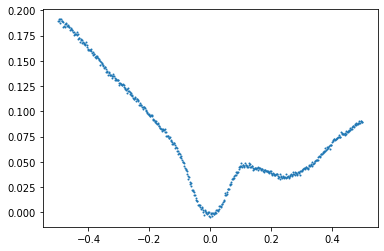

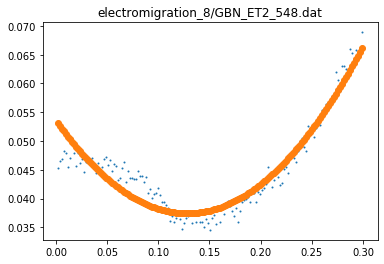

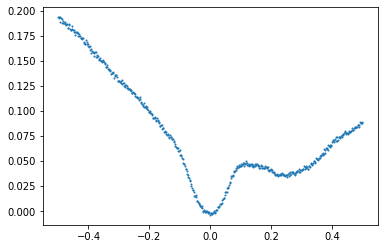

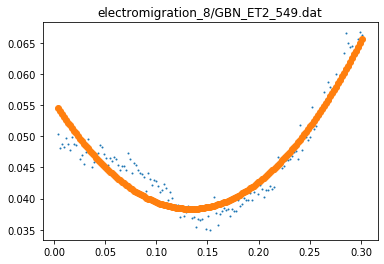

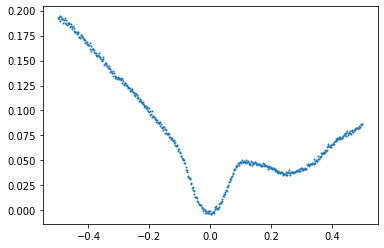

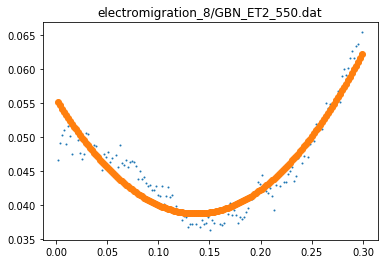

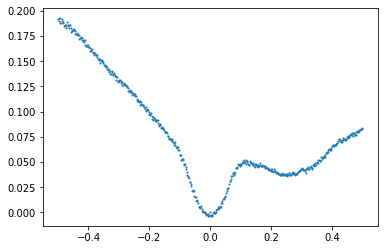

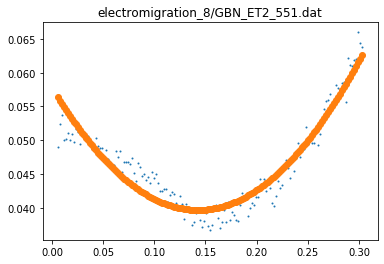

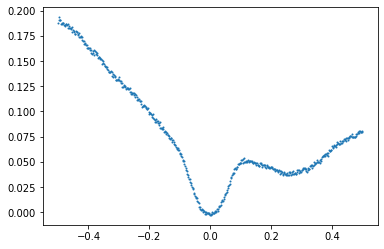

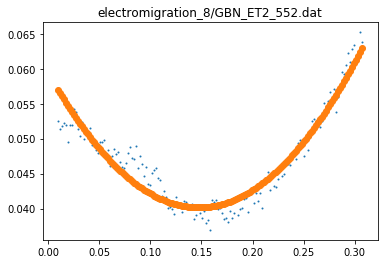

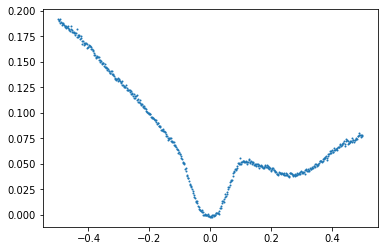

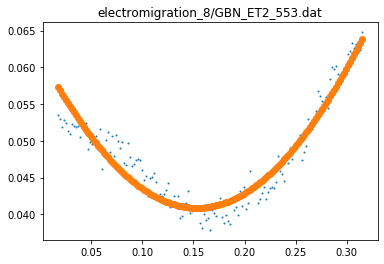

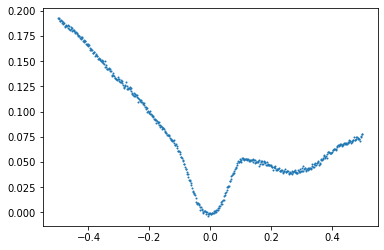

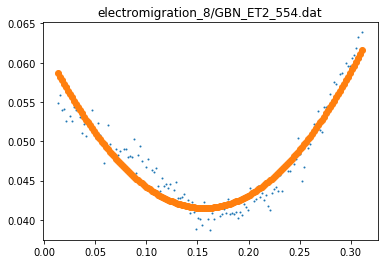

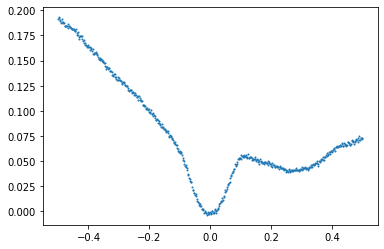

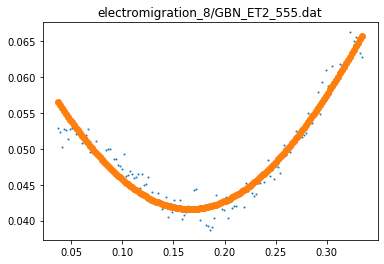

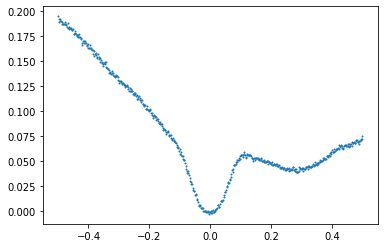

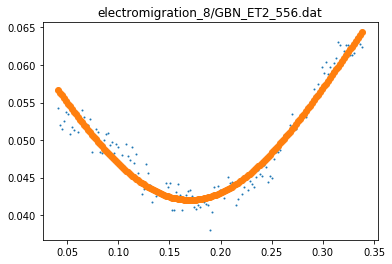

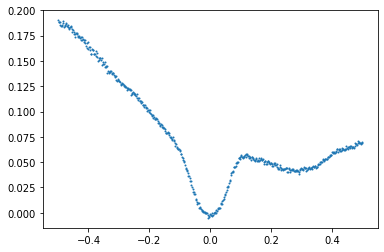

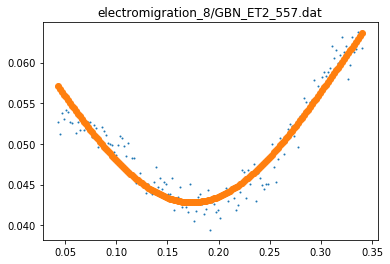

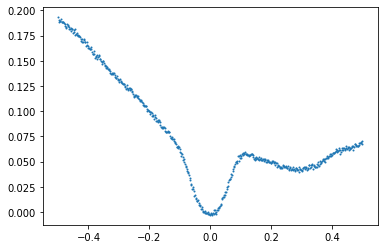

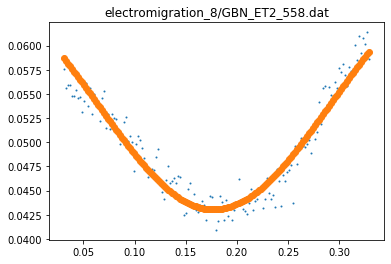

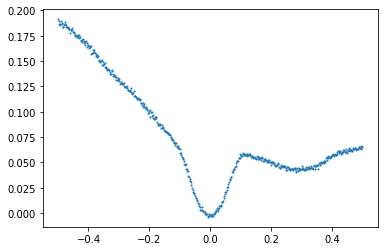

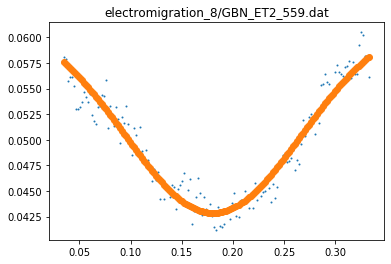

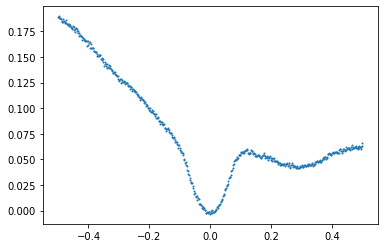

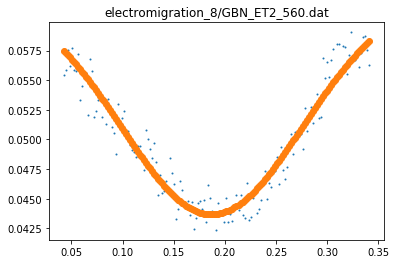

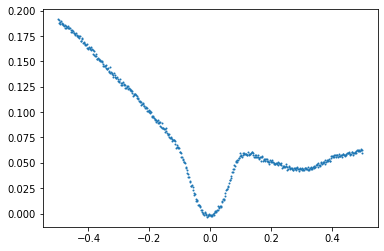

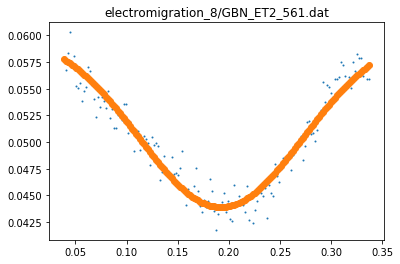

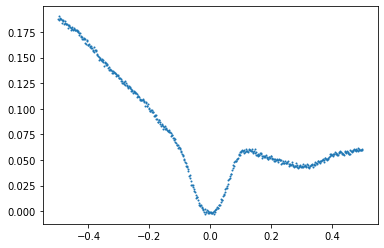

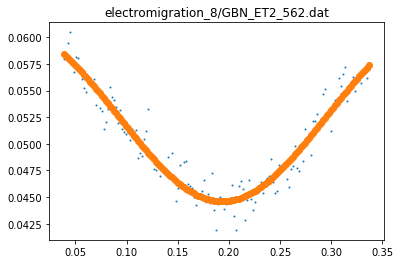

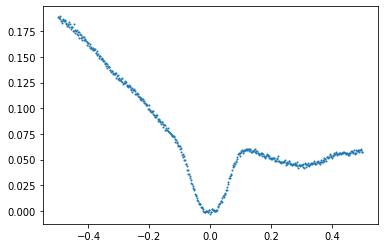

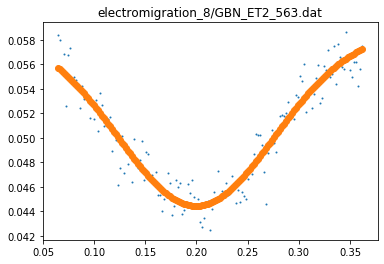

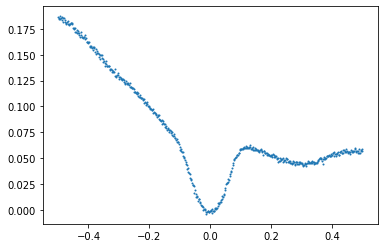

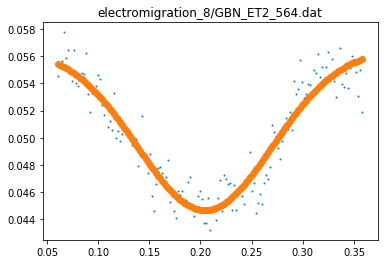

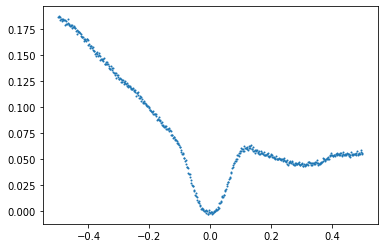

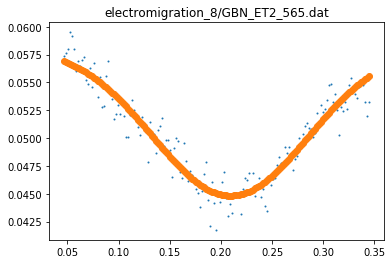

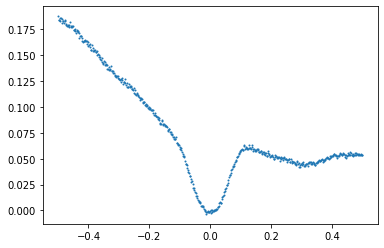

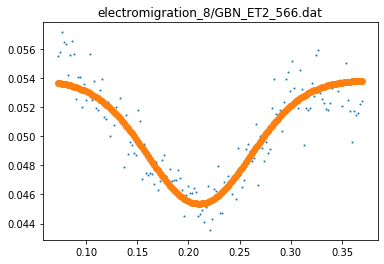

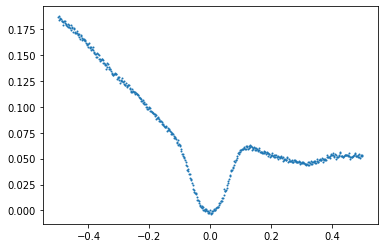

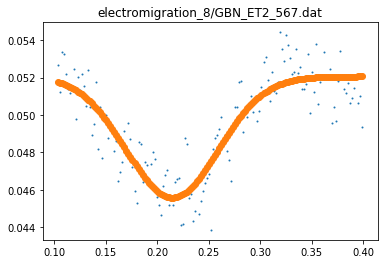

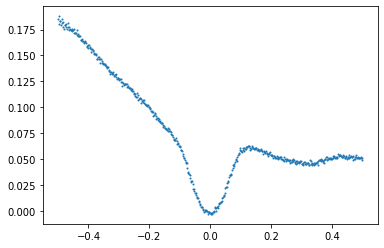

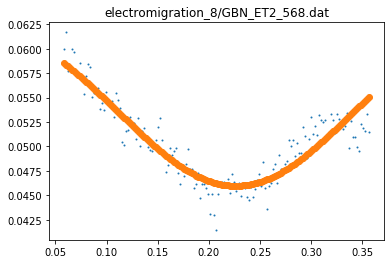

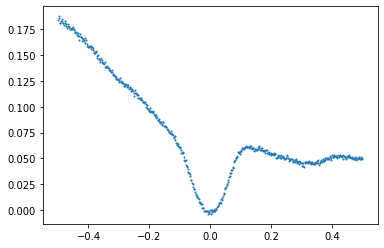

In [143]:
N_RANGE = (508, 569)
files = file_list(N_RANGE)
c = []
for i, f in enumerate(files):
    df = file2df(f)
    #if i < 0:
    c.append(fit_dirac(df, crop=(-0.1, 0.1), fit_window=(-0.15, 0.15), right=True, fname=f))
    #else:
    #    c.append(find_min(df, guess=0.2, sig=10))

(0, 0.3)

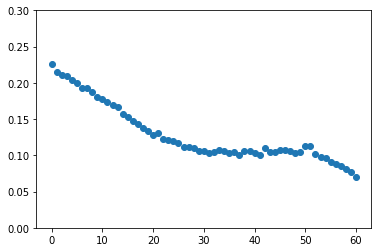

In [145]:
plt.plot(np.array(c[::-1]), 'o')
plt.ylim(0, 0.3)

/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.13799179 1.24856468 0.02290422 0.01062047]
[-0.02295936  0.12124715  0.00202415  0.00976647]
[-0.01808879  0.12954176  0.00125144  0.01280275]
[-0.01454728  0.1566493   0.00088275  0.01236907]
[-0.02332026  0.18120396  0.00110693  0.01632506]
[0.03204196 0.04885631 0.00488146 0.04031223]
[-0.03094294  0.21926617  0.00144932  0.02063911]
[0.03982882 0.06416338 0.00746596 0.05187364]
[0.0771147  0.06936204 0.0195709  0.09181934]
[0.07627314 0.07100599 0.02125428 0.09226187]
[0.05892441 0.07363761 0.01714186 0.07573479]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[3.50117872e+02 8.02193495e-02 1.13167461e+02 3.50135152e+02]
[9.59919804e+02 8.71058996e-02 3.29756378e+02 9.59939599e+02]
[3.79272188e+02 9.48871923e-02 1.16117751e+02 3.79291103e+02]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[4.26645194e+02 9.71972363e-02 1.19934949e+02 4.26663785e+02]
[1.32742062e+02 9.80582630e-02 3.87309218e+01 1.32760732e+02]
[2.81314957e+02 9.80689857e-02 7.99257268e+01 2.81334500e+02]
[5.87834639e+02 1.00017695e-01 1.78213381e+02 5.87856031e+02]
[1.27621101e+02 1.01747197e-01 4.40967063e+01 1.27644383e+02]
[4.01067063e+02 1.05354458e-01 1.26448353e+02 4.01090183e+02]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[3.40797948e+02 1.05703518e-01 1.04660747e+02 3.40820864e+02]
[6.70612035e+02 1.09696674e-01 1.99712676e+02 6.70635151e+02]
[3.42420522e+02 1.07982365e-01 9.83154628e+01 3.42443779e+02]
[5.95947697e+02 1.06367194e-01 1.80175739e+02 5.95971990e+02]
[3.26336433e+02 1.06983562e-01 9.65199367e+01 3.26361170e+02]
[1.63078813e+02 1.06806685e-01 4.69531042e+01 1.63103189e+02]
[5.04531430e+02 1.03760954e-01 1.44329448e+02 5.04555014e+02]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[4.91621070e+02 1.04260265e-01 1.42782522e+02 4.91644713e+02]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[2.76360145e+02 1.06673456e-01 7.27612960e+01 2.76383575e+02]
[4.34890712e+02 1.06547907e-01 1.20270119e+02 4.34915140e+02]
[1.95913937e+02 1.07959848e-01 5.23510584e+01 1.95938334e+02]
[2.81202602e+02 1.09414763e-01 7.49547864e+01 2.81228182e+02]
[0.37809876 0.10862771 0.10417509 0.40492214]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[2.18113222e+02 1.11000019e-01 5.91846282e+01 2.18140622e+02]
[1.31989093e+02 1.13806398e-01 3.86889898e+01 1.32017836e+02]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[1.18188088e+02 1.16075009e-01 3.75855934e+01 1.18217547e+02]
[2.10769384e+02 1.19733185e-01 6.82162479e+01 2.10800085e+02]
[52.04609751  0.12162442 19.15655665 52.07848792]
[2.55222040e+02 1.26655493e-01 9.01499877e+01 2.55255046e+02]
[4.41420238e+02 1.31436542e-01 1.74744484e+02 4.41454678e+02]
[3.90415672 0.13236168 1.67342728 3.93950102]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[1.73974870e+02 1.39186108e-01 7.76816715e+01 1.74011641e+02]
[0.16173657 0.14238361 0.07078887 0.19910517]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[51.47465366  0.14739417 23.23435689 51.51232734]
[0.04369764 0.14967262 0.01660905 0.08225174]
[0.02547668 0.15629437 0.00822975 0.06430394]
[0.08885484 0.16070593 0.03903341 0.12875793]
[0.05775265 0.16451122 0.02548306 0.09833108]
[0.02097165 0.17094879 0.00648873 0.06127481]
[0.03283627 0.17321406 0.01343204 0.07430161]
[0.03033834 0.17791026 0.01149165 0.07149159]
[0.02533813 0.1810831  0.00943081 0.06702799]
[0.02223165 0.18708186 0.008379   0.06482424]
[0.02346468 0.19245121 0.0094185  0.06628695]
[0.01752135 0.19535593 0.005788   0.06012083]
[0.0252986  0.19758288 0.01218223 0.06912255]
[0.01267848 0.20056348 0.00396727 0.05608331]
[0.03446262 0.20680234 0.0193848  0.07904188]
[0.01101645 0.20908212 0.00327265 0.05487645]
[0.00901955 0.20990887 0.00222585 0.05310758]
[0.02437352 0.21602395 0.01283322 0.06924083]


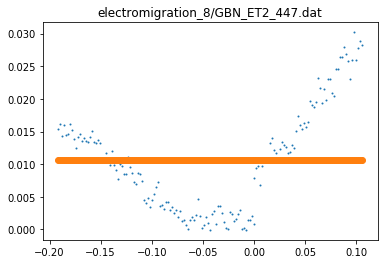

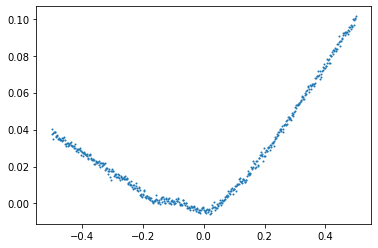

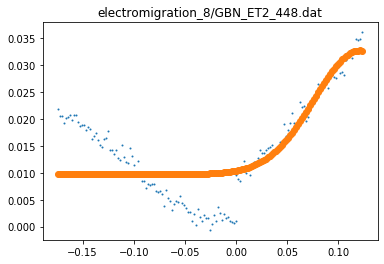

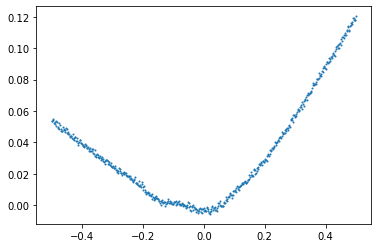

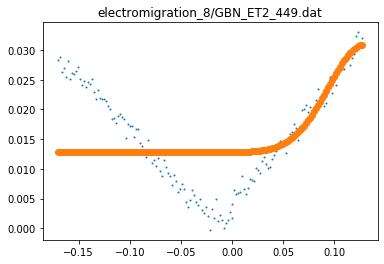

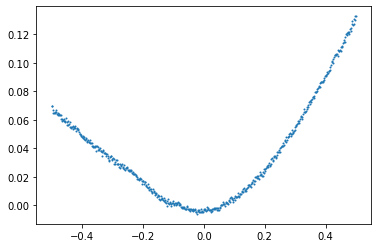

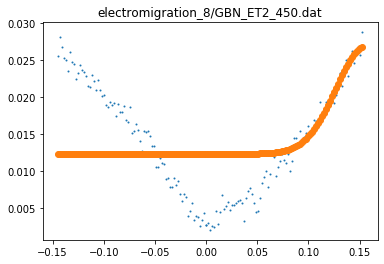

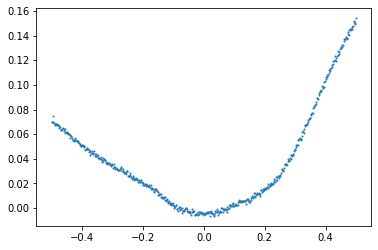

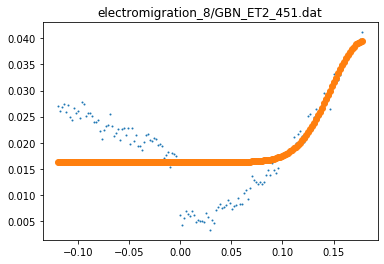

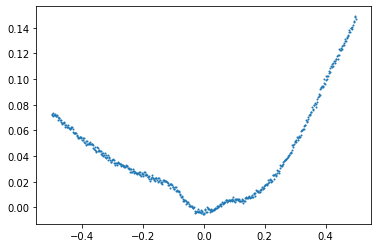

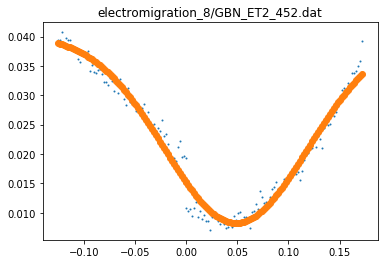

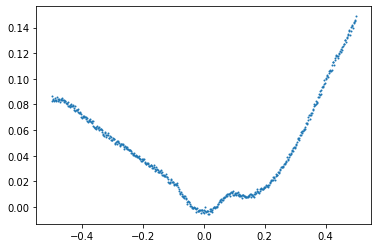

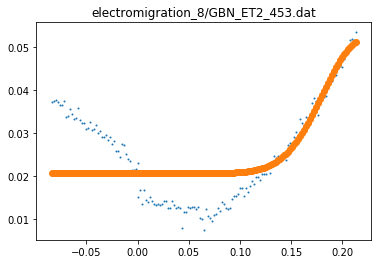

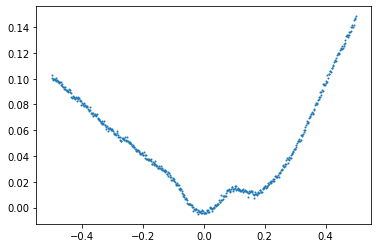

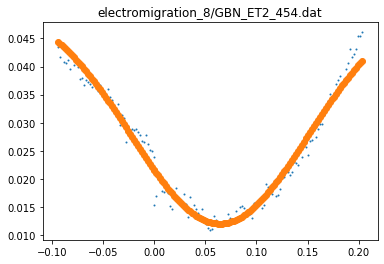

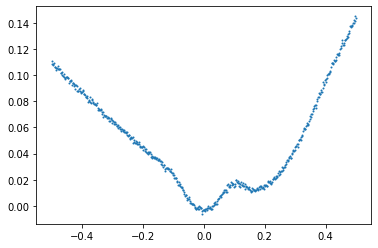

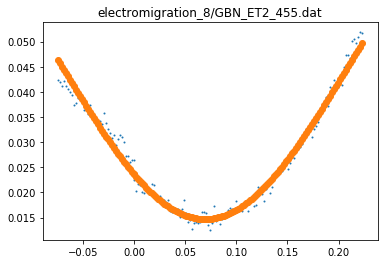

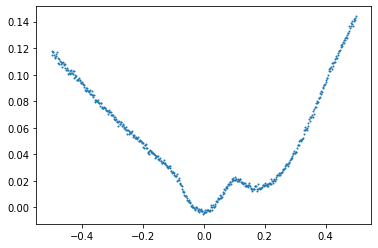

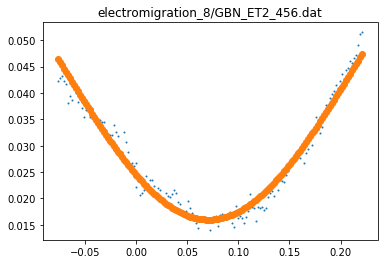

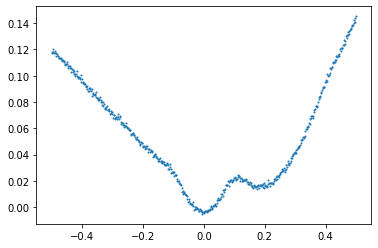

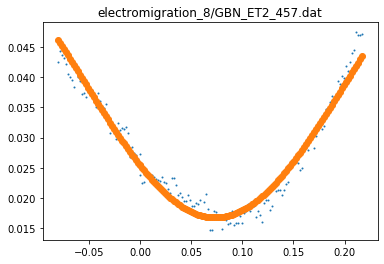

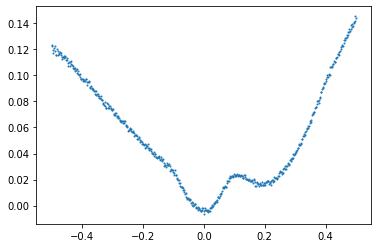

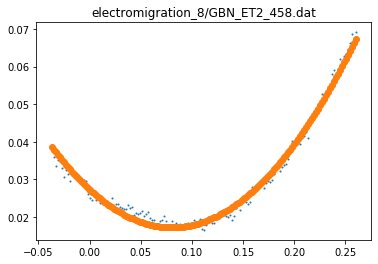

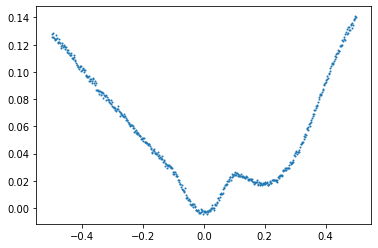

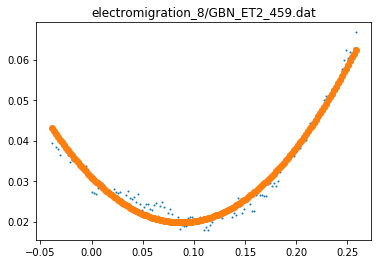

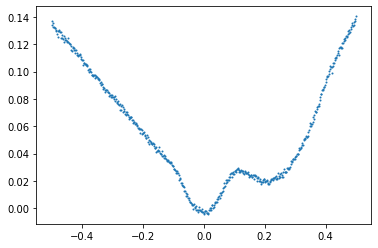

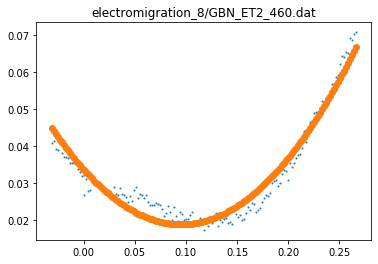

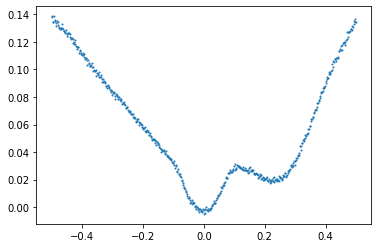

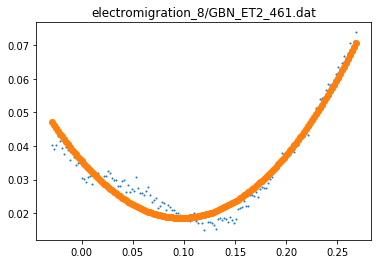

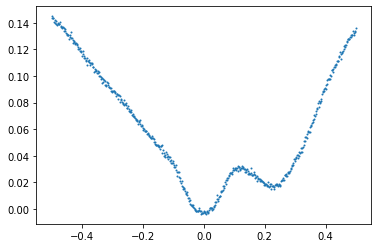

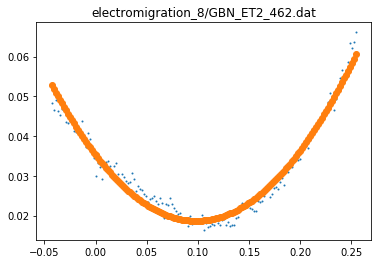

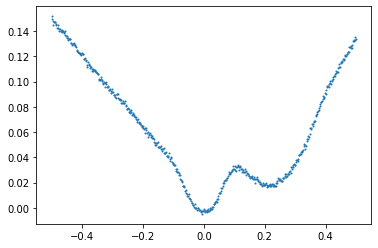

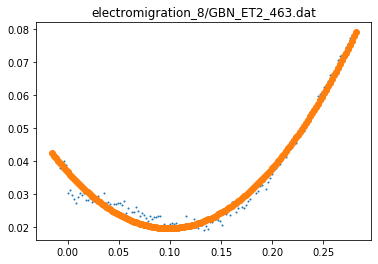

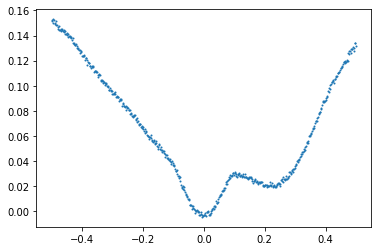

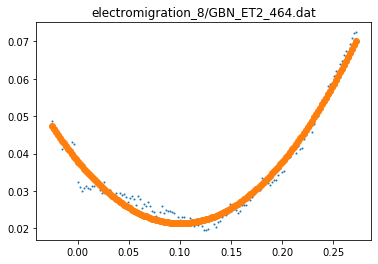

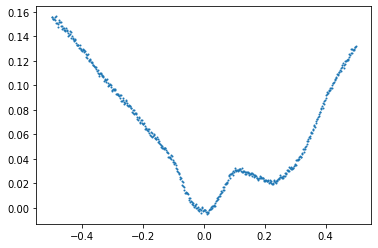

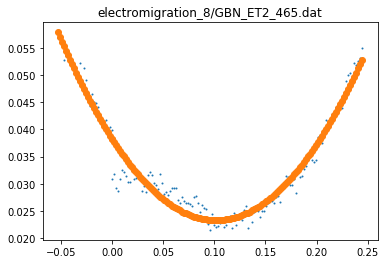

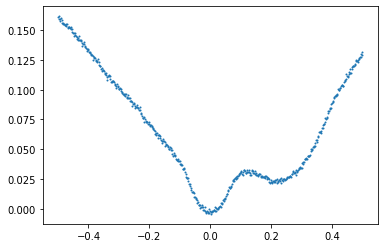

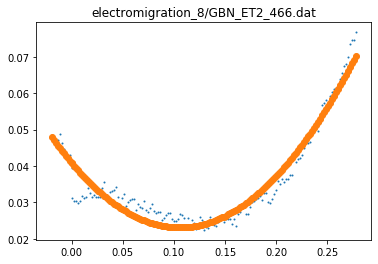

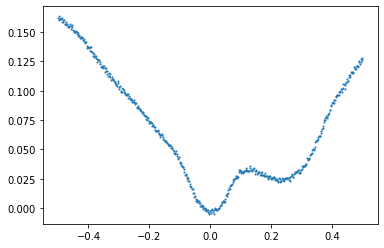

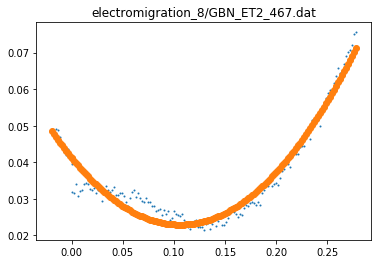

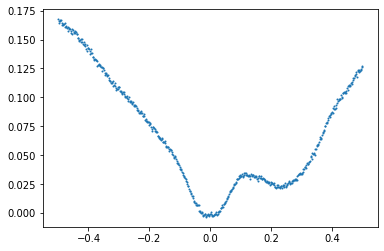

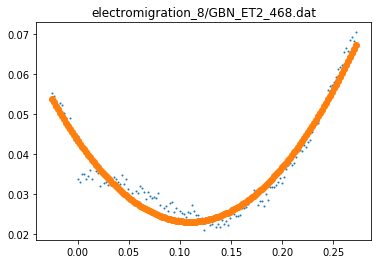

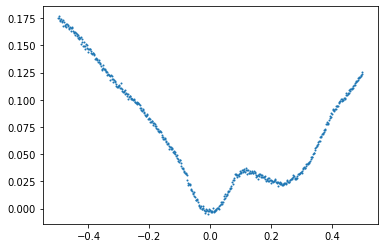

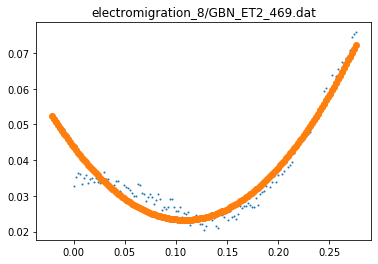

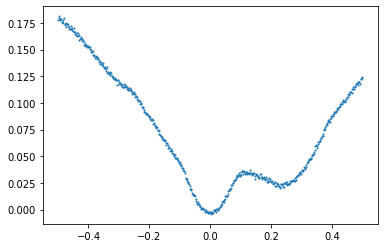

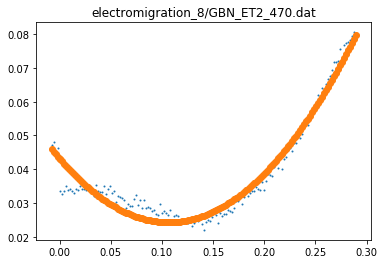

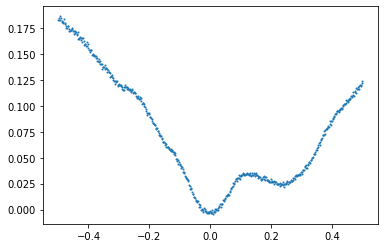

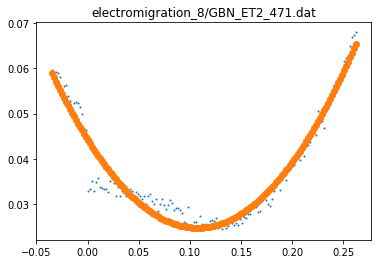

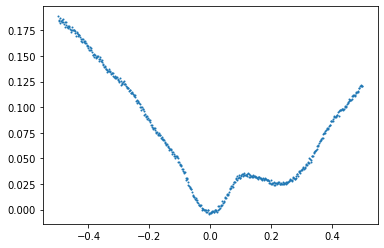

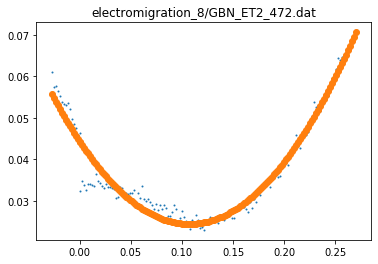

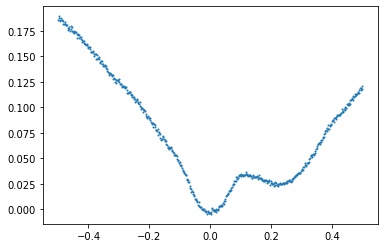

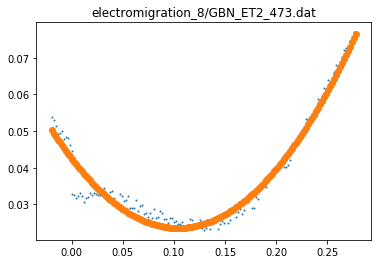

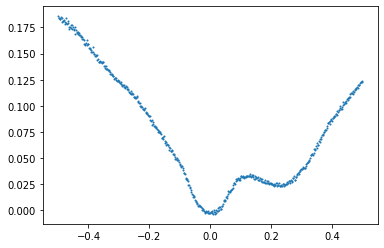

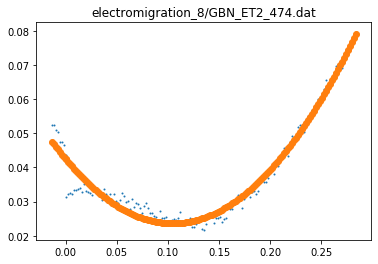

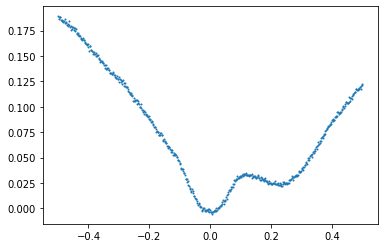

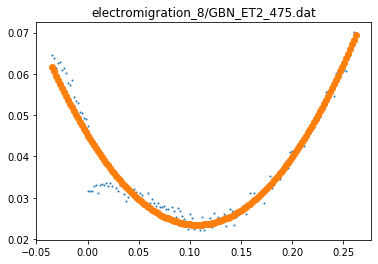

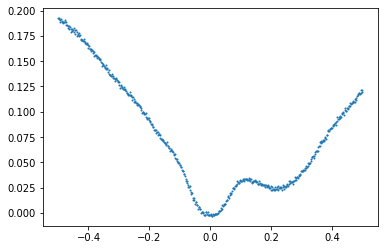

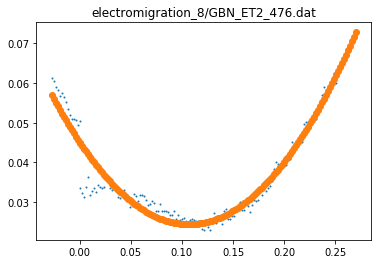

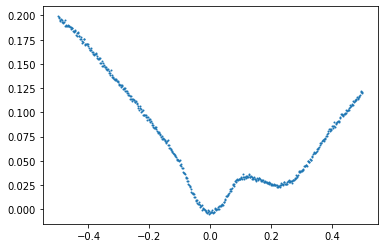

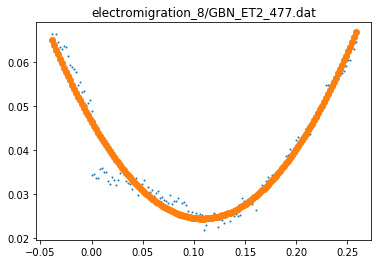

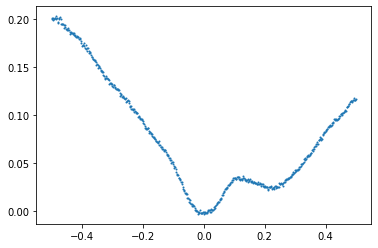

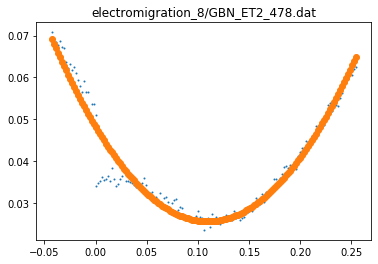

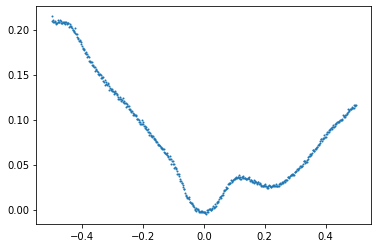

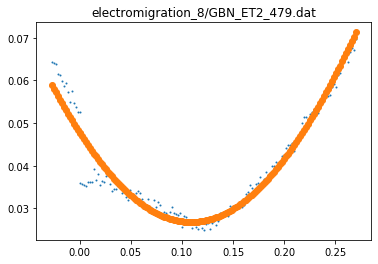

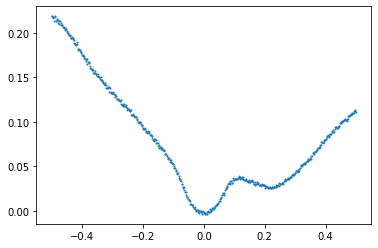

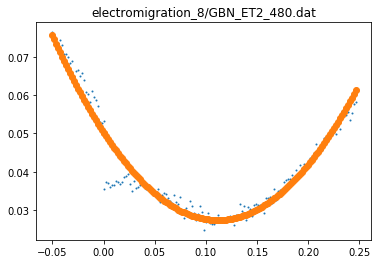

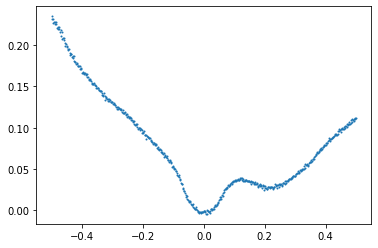

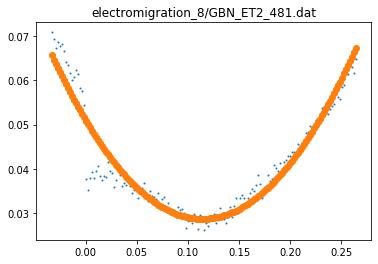

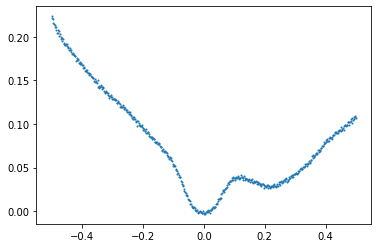

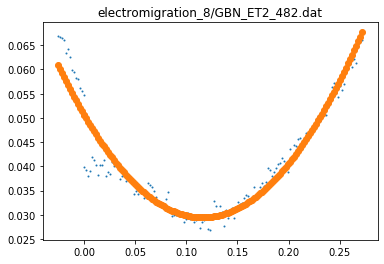

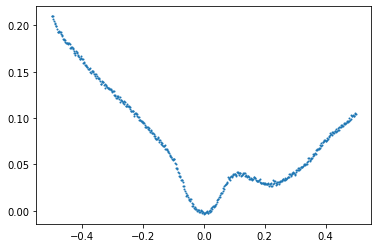

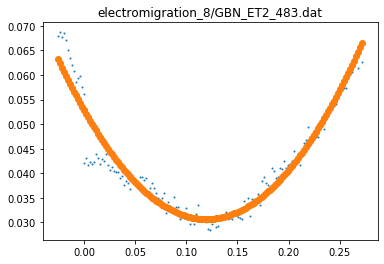

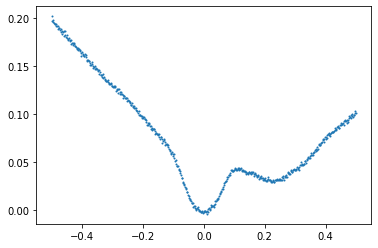

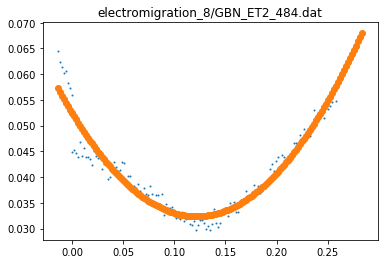

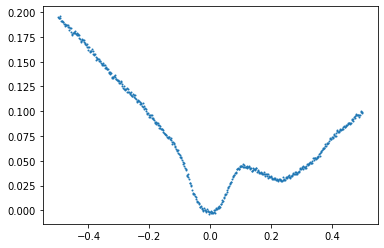

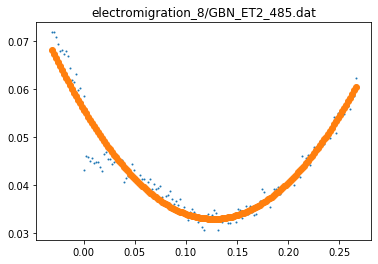

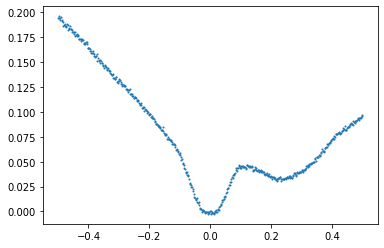

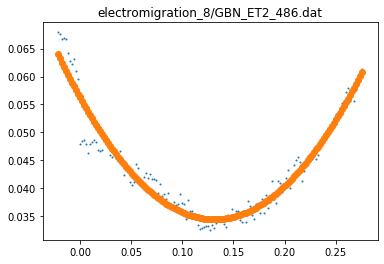

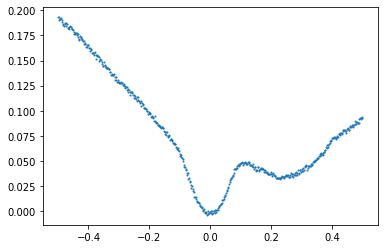

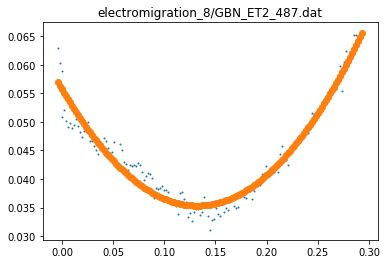

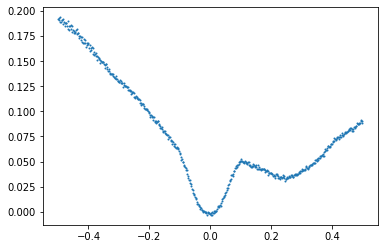

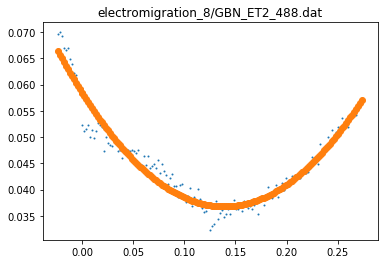

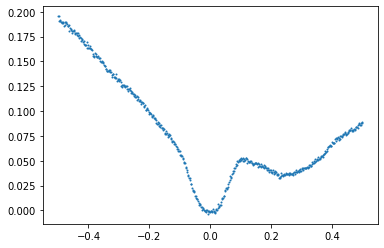

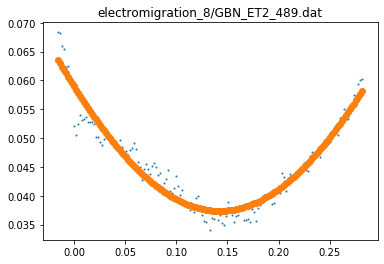

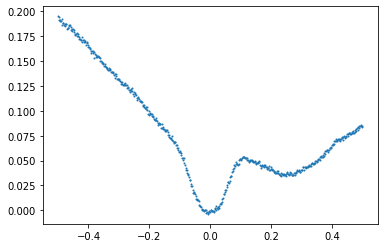

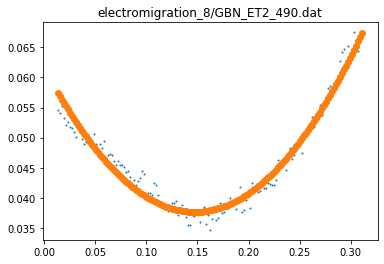

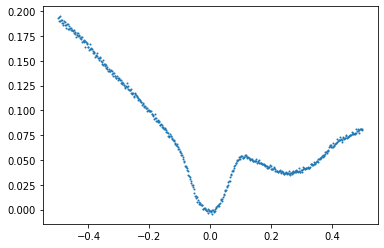

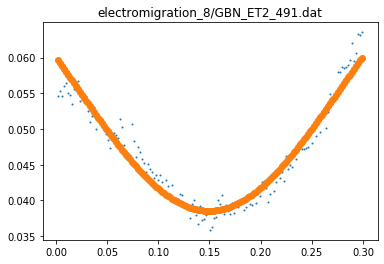

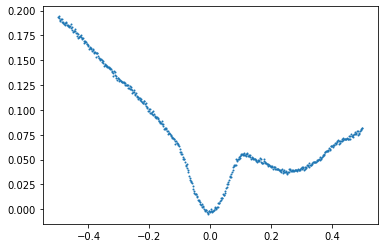

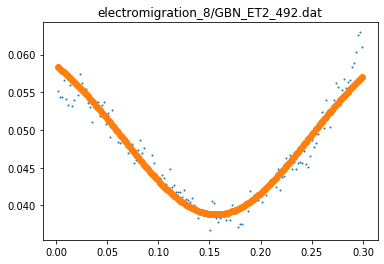

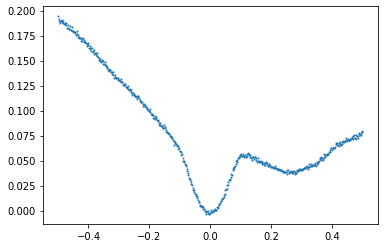

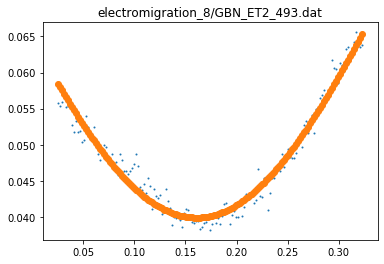

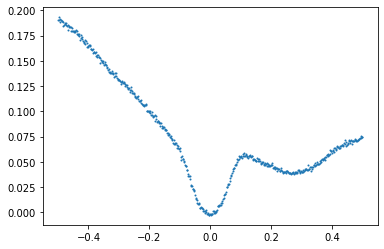

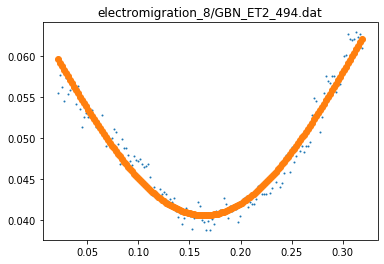

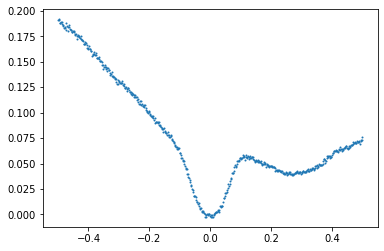

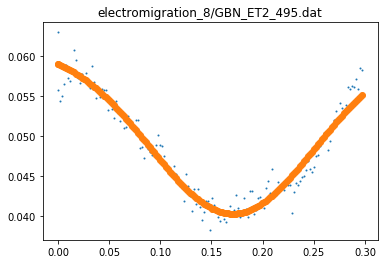

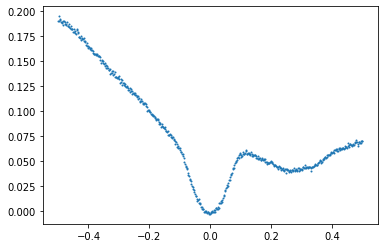

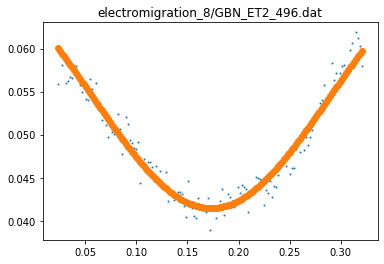

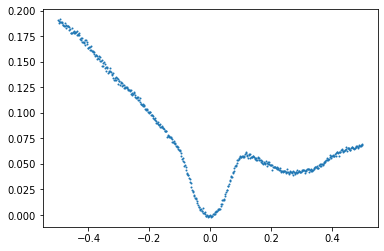

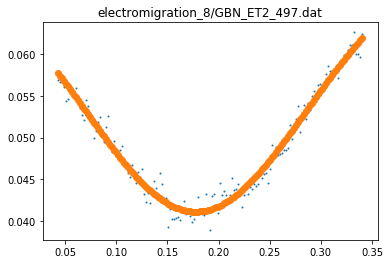

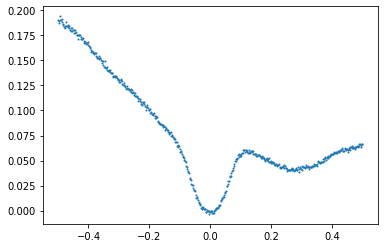

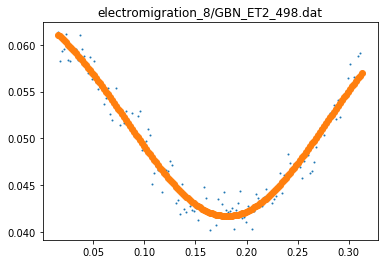

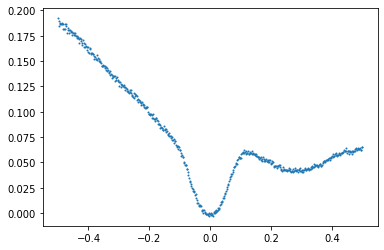

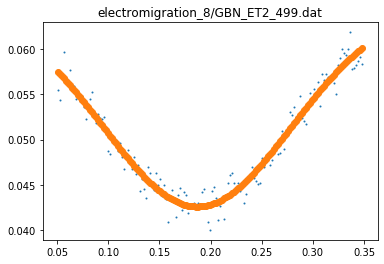

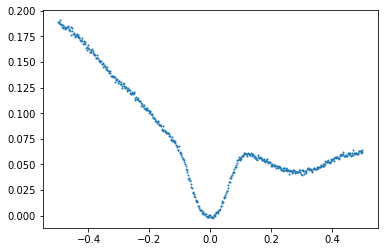

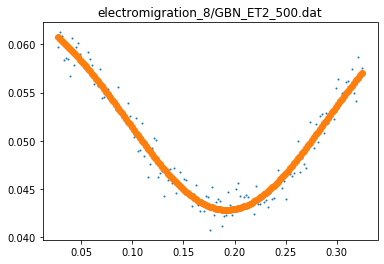

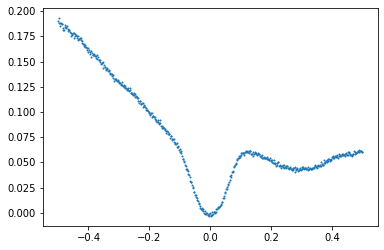

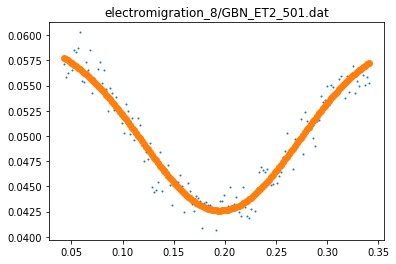

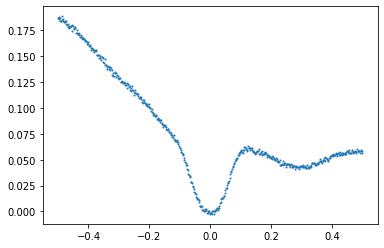

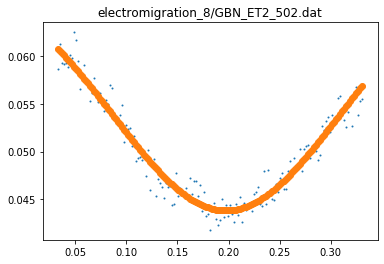

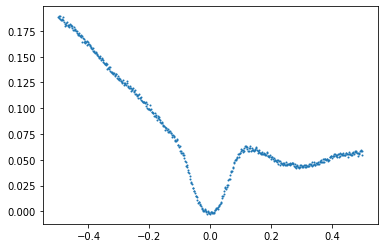

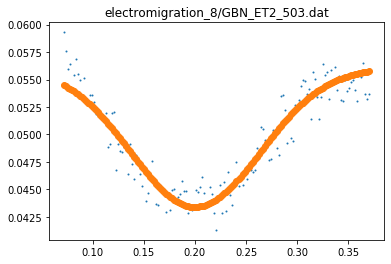

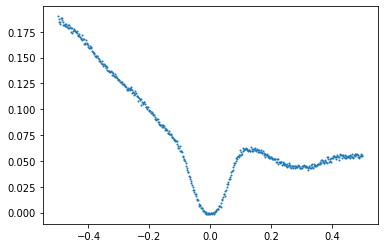

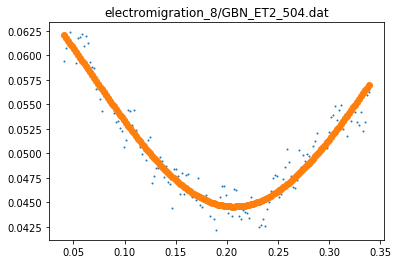

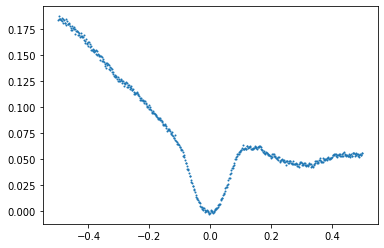

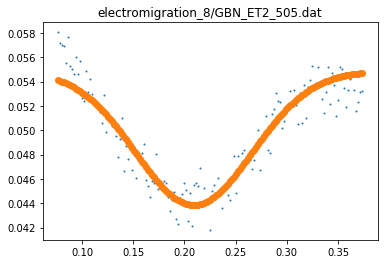

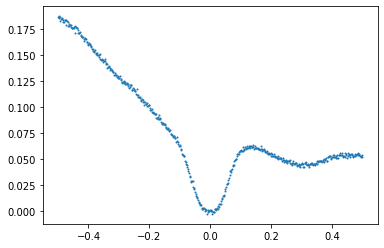

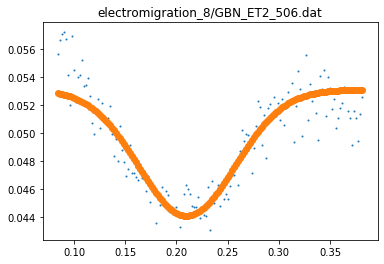

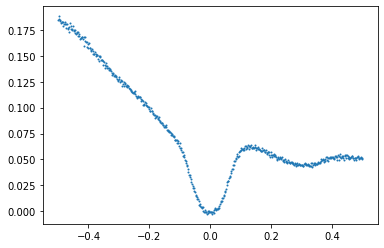

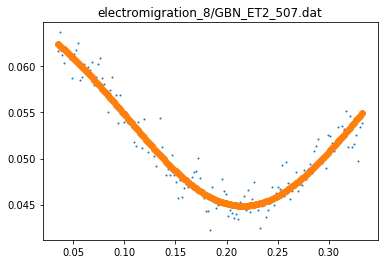

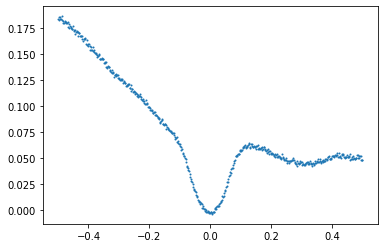

In [149]:
N_RANGE = (447, 508)
files = file_list(N_RANGE)
d = []
for i, f in enumerate(files):
    df = file2df(f)
    #if i < 5:
    d.append(fit_dirac(df, crop=(-0.1, 0.1), fit_window=(-0.15, 0.15), right=False, fname=f))
    #else:
    #    d.append(find_min(df, guess=0.2, sig=10))

(-0.3, 0.3)

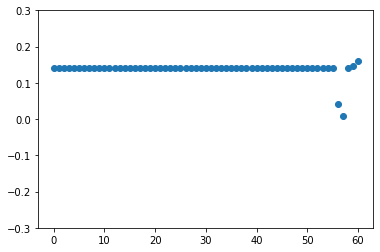

In [147]:
plt.plot(np.array(d[::-1]), 'o')
plt.ylim(-0.3, 0.3)

/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


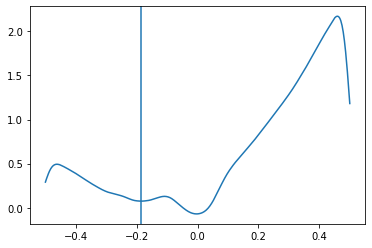

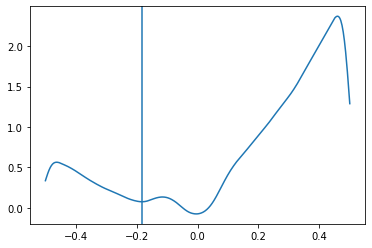

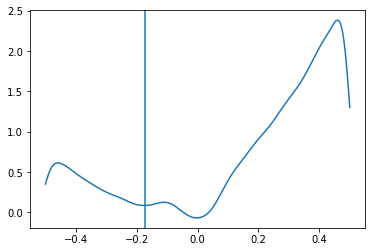

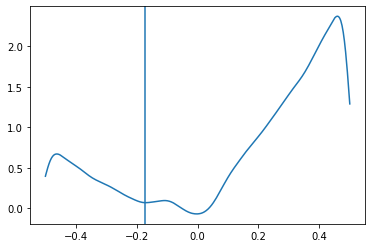

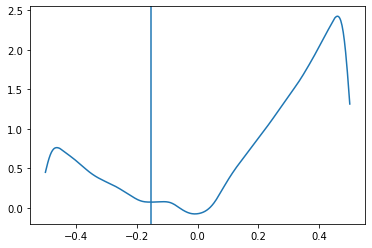

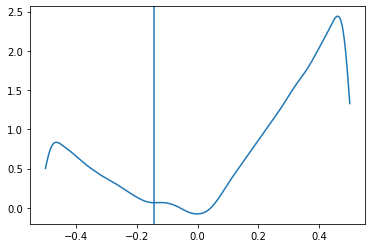

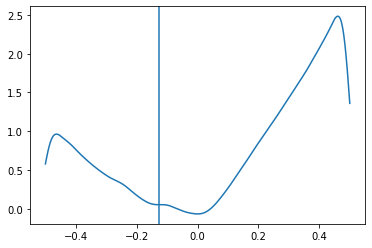

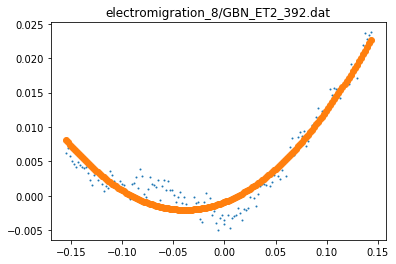

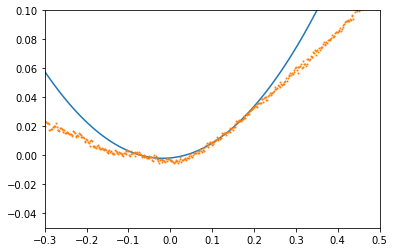

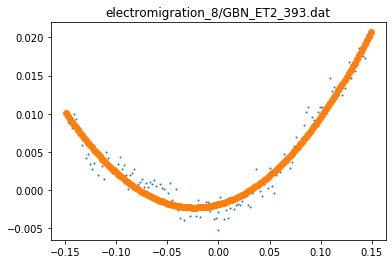

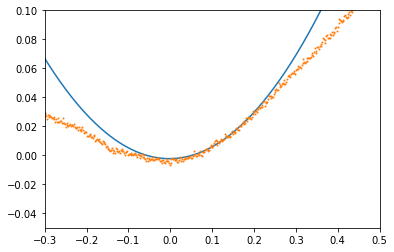

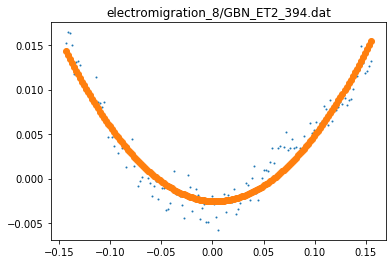

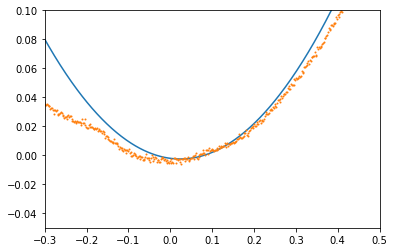

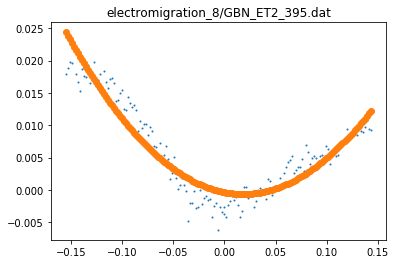

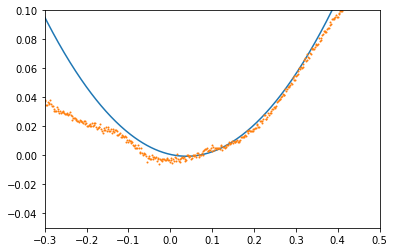

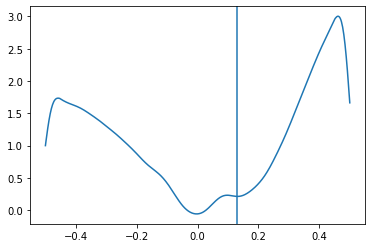

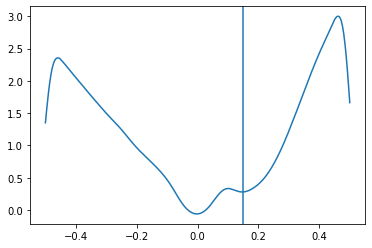

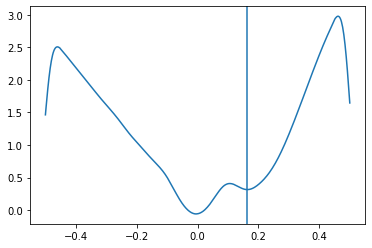

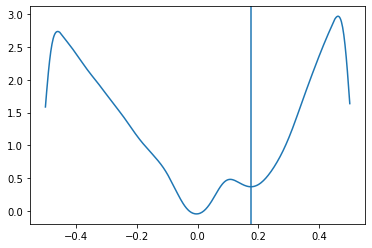

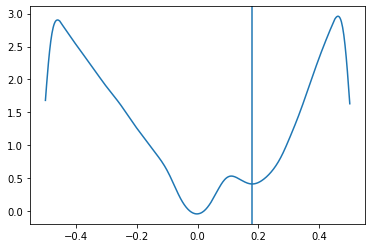

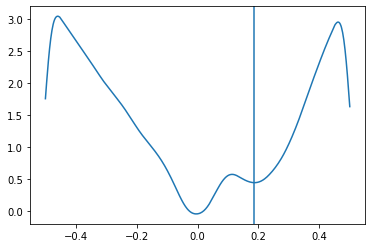

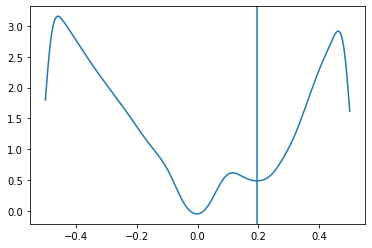

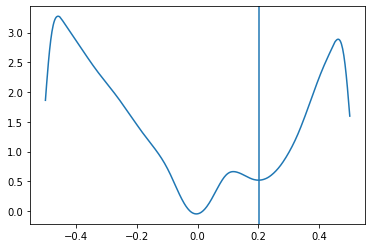

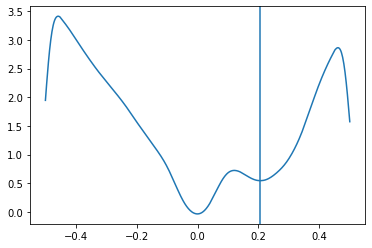

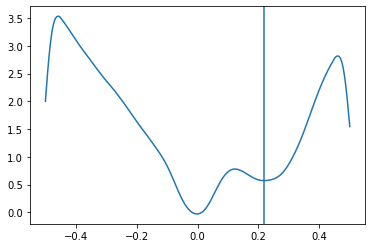

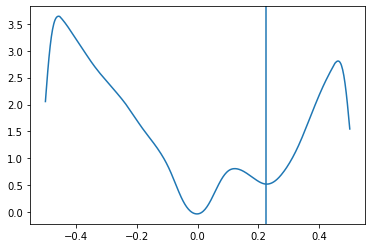

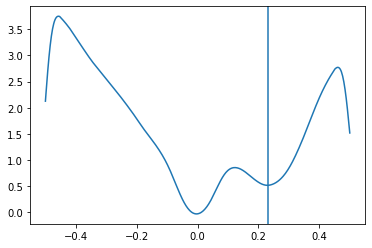

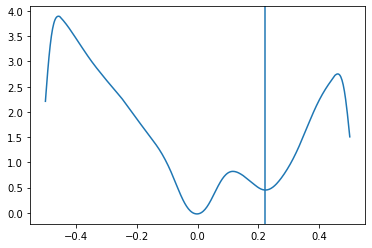

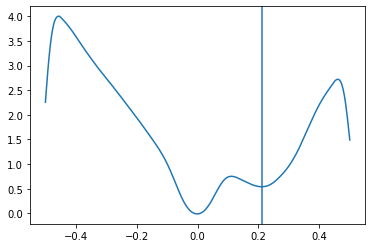

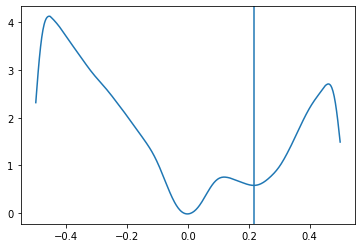

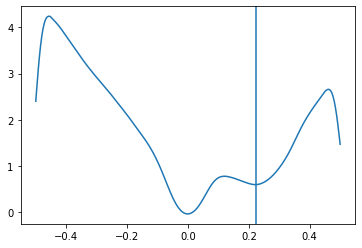

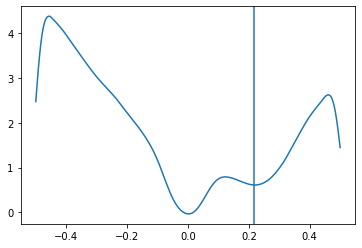

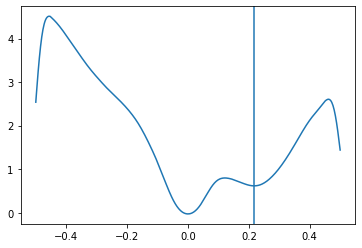

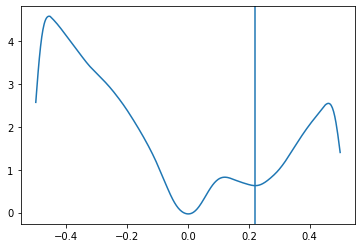

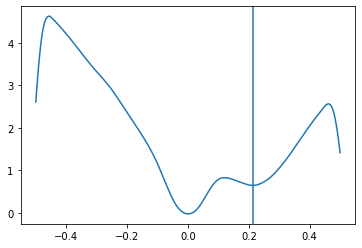

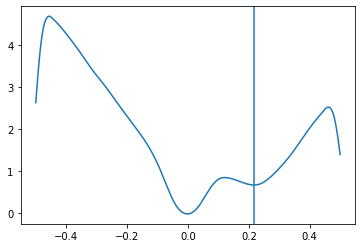

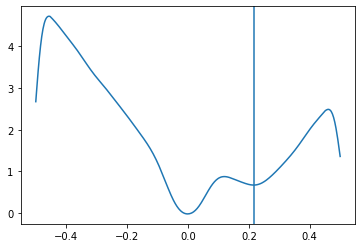

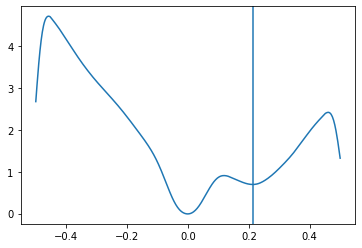

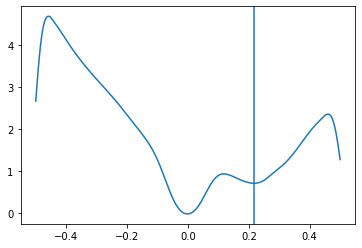

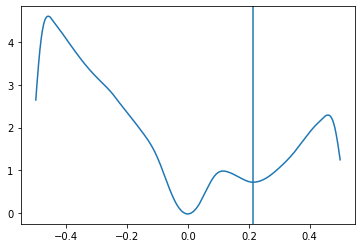

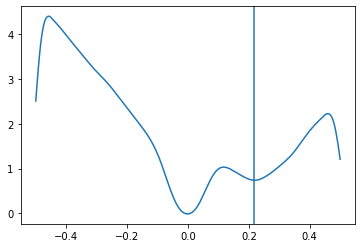

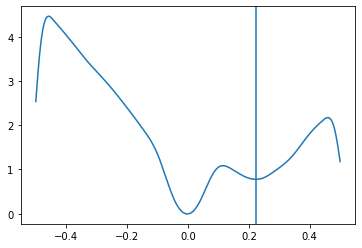

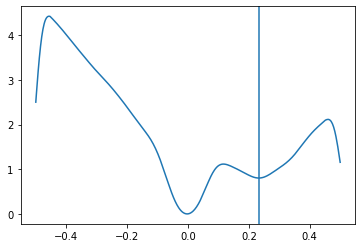

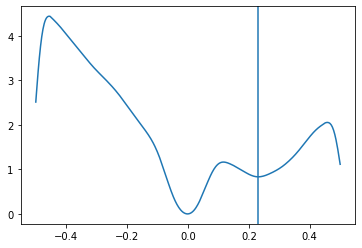

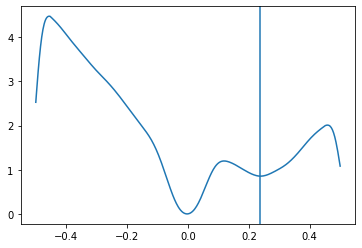

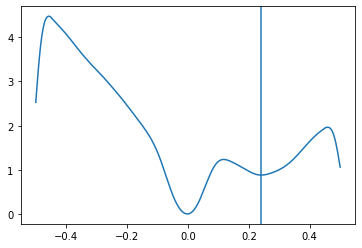

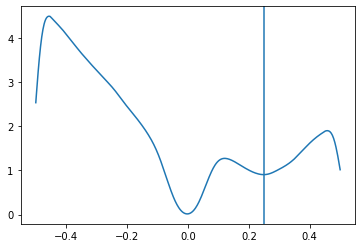

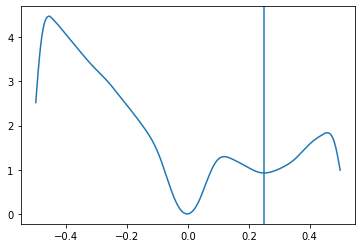

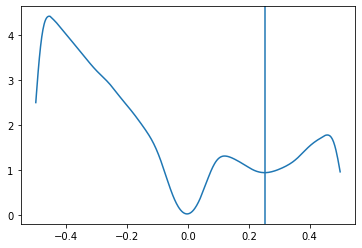

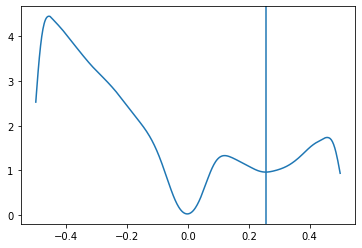

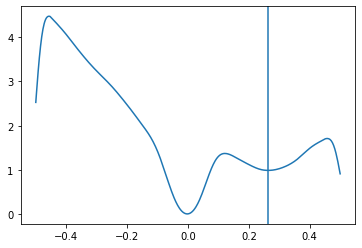

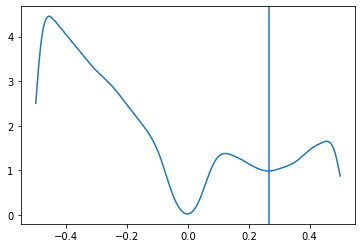

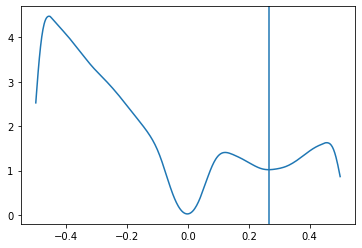

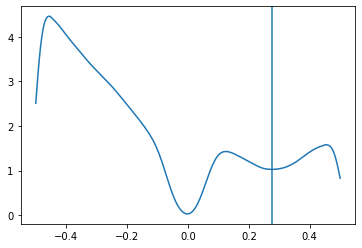

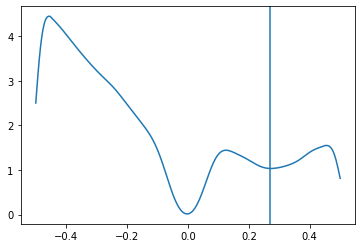

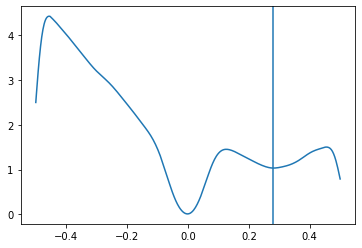

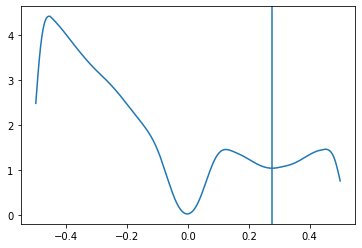

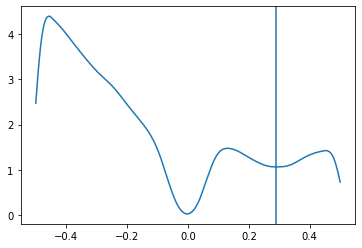

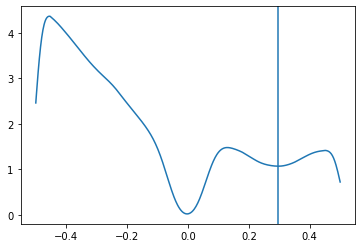

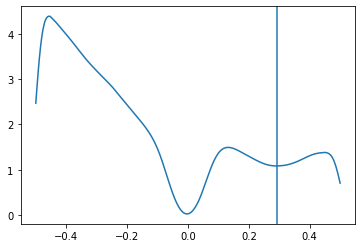

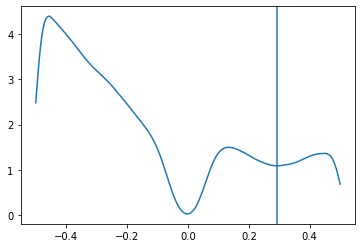

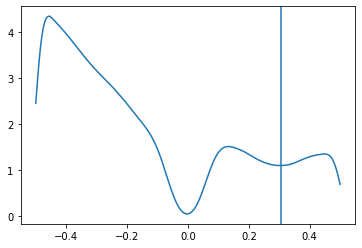

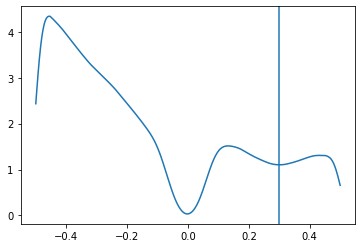

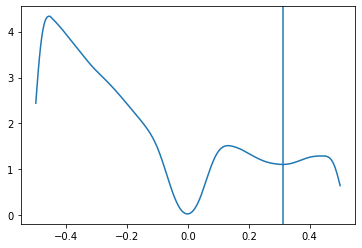

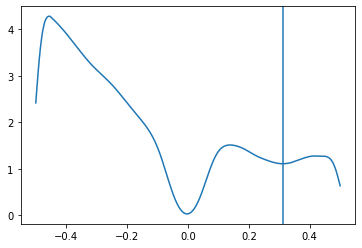

In [777]:
N_RANGE = (385, 446)
files = file_list(N_RANGE)
e = []
# for i, f in enumerate(files):
#     df = file2df(f)
#     if i < 8:
#         e.append(fit_dirac(df, crop=(-0.1, 0.08), fit_window=(-0.15, 0.15), right=True, fname=f))
#     elif i < 10:
#         e.append(fit_dirac(df, crop=(-0, 0), fit_window=(-0.15, 0.15), right=True, fname=f))
#     elif i < 17:
#         e.append(fit_dirac(df, crop=(-0.085, 0.09), fit_window=(-0.11, 0.1), fname=f))
#     else:
#         e.append(fit_dirac(df, crop=(-0.09, 0.11), fit_window=(-0.12, 0.12), fname=f))
for i, f in enumerate(files):
    df = file2df(f)
    if i < 7:
        e.append(find_min(df, guess=-0.2, sig=10))
    elif i < 11:
        e.append(fit_dirac(df, crop=(-0.02, 0.02), fit_window=(-0.15, 0.15), right=True, fname=f))
    else:
        e.append(find_min(df, guess=0.2, sig=10))

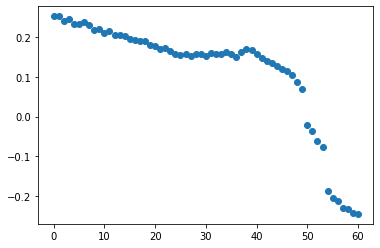

In [778]:
plt.plot(np.array(e[::-1]), 'o')

/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[1.34648949e-01 1.07612135e+00 5.65186930e-04 8.30505656e-03]
[-0.01795643  0.03499017  0.00064033  0.00663929]
[0.05135753 1.02314671 0.0177351  0.00886445]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[1.12911173 3.21987058 0.09686307 0.00788899]
[0.32716268 1.53813951 0.02584026 0.01006562]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.97019971 3.07866718 0.10319137 0.00832255]
[0.63923708 2.23237704 0.07574918 0.00936486]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.81794784 2.68896872 0.09220218 0.00944828]
[1.01236988 3.22527292 0.11141474 0.00958079]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To cont

[0.37641785 1.76656897 0.03718403 0.01088323]
[0.65192832 2.39547731 0.09001376 0.01098224]
[0.36294221 1.84511844 0.03202984 0.01234501]


/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[0.16601438 1.27223408 0.02392883 0.01378818]
[0.17268412 1.34648963 0.02489334 0.01463724]
[-0.02835325  0.11733752  0.0026446   0.00944191]
[-0.02803568  0.13852979  0.00243288  0.01215902]
[-0.025858    0.1516183   0.00126093  0.01262967]
[0.0345893  0.03026485 0.00526565 0.04214714]
[0.04719304 0.04284665 0.00709323 0.05550982]
[-0.02302882 -0.09128378  0.00126256  0.02226449]
[-0.01955145 -0.07519442  0.00082282  0.02564413]
[0.07023936 0.06791813 0.01360113 0.08445829]
[0.12372332 0.07518434 0.02709795 0.13978608]
[0.14215877 0.08106852 0.03351614 0.15990323]
[0.18896918 0.08458124 0.04724296 0.20799732]
[2.02220982e+02 8.94583040e-02 5.66867836e+01 2.02241866e+02]
[0.85154318 0.09240982 0.24159532 0.87341529]
[4.10231962e+02 9.92137879e-02 1.27260784e+02 4.10256134e+02]
[4.92797916e+02 1.02845524e-01 1.42132342e+02 4.92821892e+02]
[0.67012917 0.10517463 0.16863305 0.69260477]
[0.88927718 0.1038415  0.23172324 0.91278009]
[0.78430748 0.10595123 0.19549396 0.8082712 ]
[0.23676578 

/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[4.51768457e+02 1.16370338e-01 1.28989440e+02 4.51796554e+02]
[5.44132552e+02 1.19690246e-01 1.59691174e+02 5.44161820e+02]
[2.00180126e+02 1.21812973e-01 6.05418865e+01 2.00210629e+02]
[0.25955545 0.12626064 0.08222545 0.29113811]
[0.13577586 0.12866004 0.04393704 0.16806831]
[0.11099984 0.13337282 0.0375254  0.14496297]
[1.27260951 0.13827955 0.49718482 1.30780136]
[0.08379318 0.14387347 0.03077468 0.11989971]
[0.04556013 0.14876746 0.01500755 0.08216089]
[0.03730165 0.15107571 0.01134189 0.0739025 ]
[0.04092993 0.15629911 0.01361873 0.07874727]
[0.05728703 0.16116696 0.01982538 0.09555241]
[0.04085555 0.16494562 0.01468445 0.08014865]
[0.04386042 0.17192688 0.01586839 0.08338448]
[0.02644101 0.17486767 0.00785438 0.06615641]
[0.02631944 0.17981069 0.00823548 0.06694976]
[0.02917809 0.18271511 0.01024307 0.07019299]
[0.02757683 0.18795486 0.00976228 0.06894428]
[0.02114354 0.19187482 0.00681078 0.06250694]
[0.02466629 0.19585069 0.00861068 0.066667  ]
[0.02695283 0.20050821 0.0111574

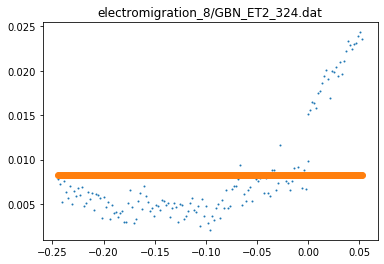

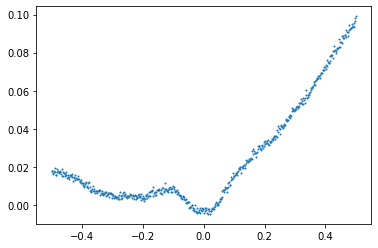

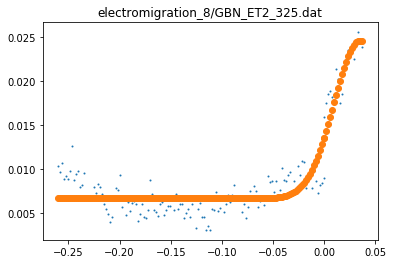

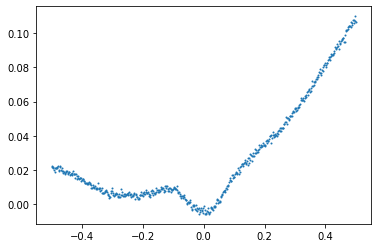

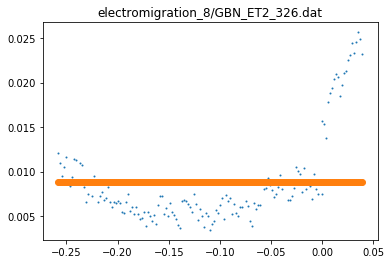

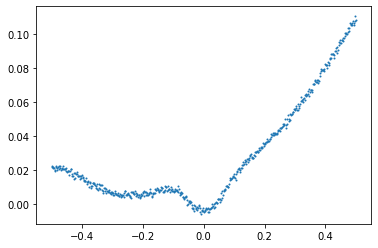

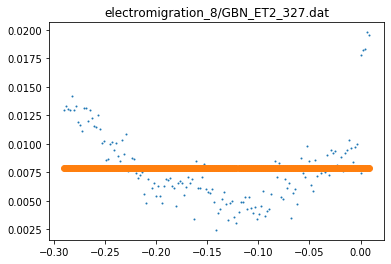

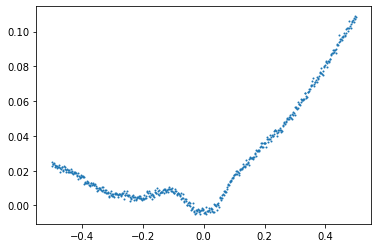

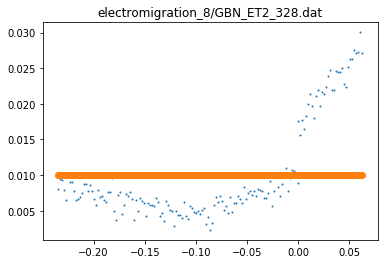

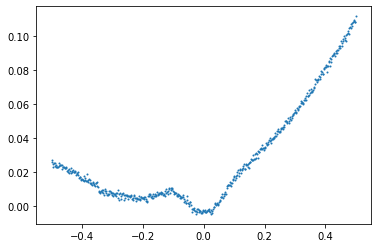

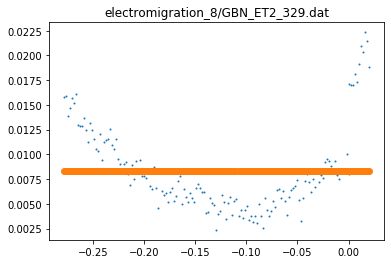

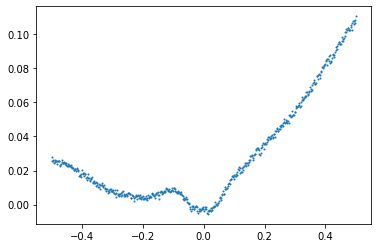

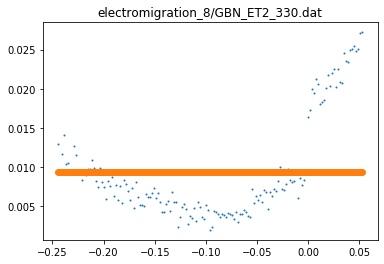

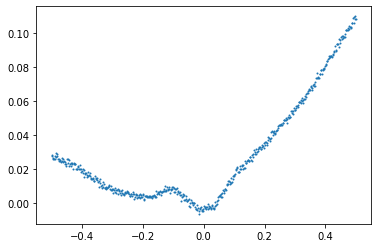

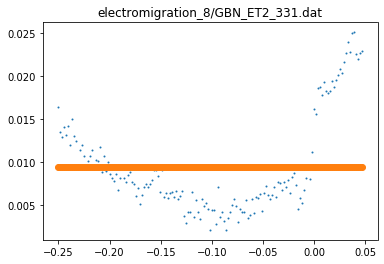

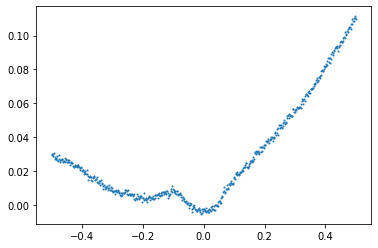

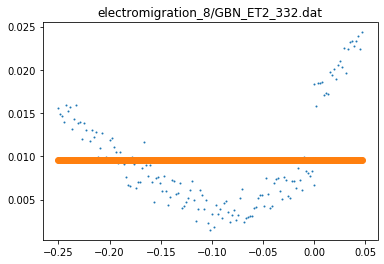

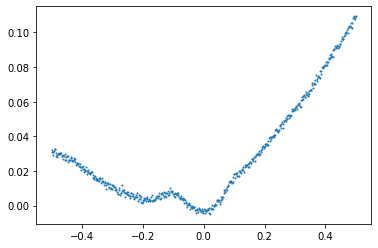

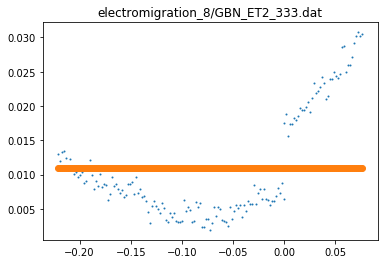

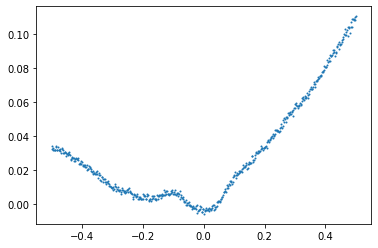

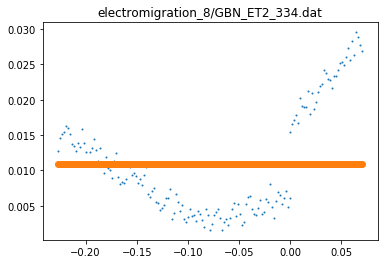

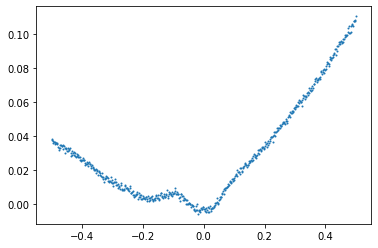

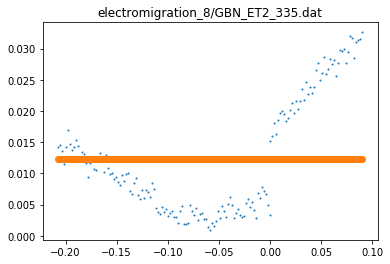

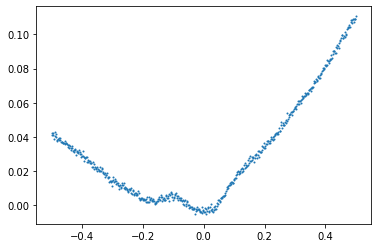

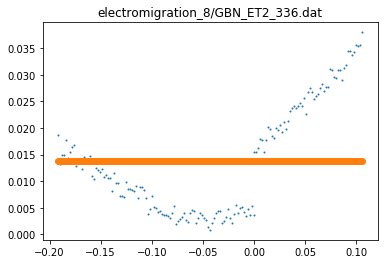

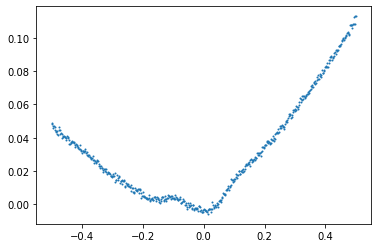

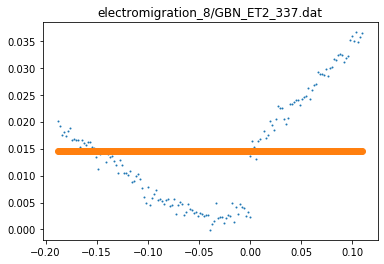

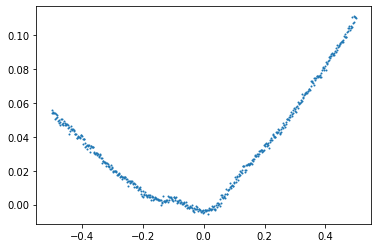

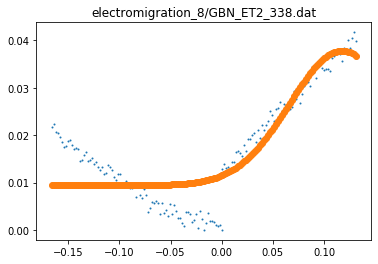

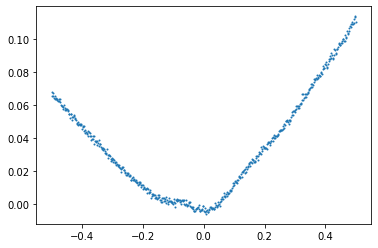

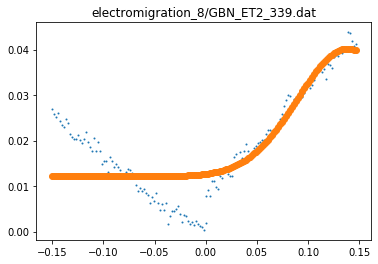

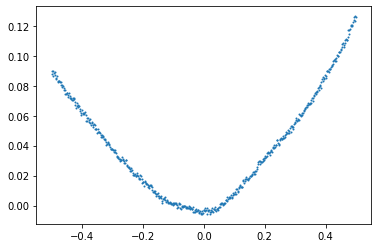

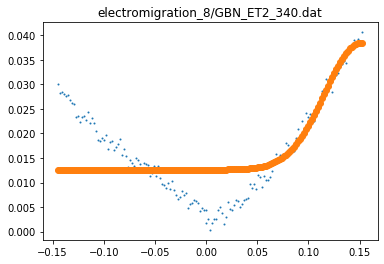

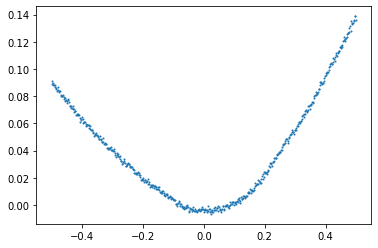

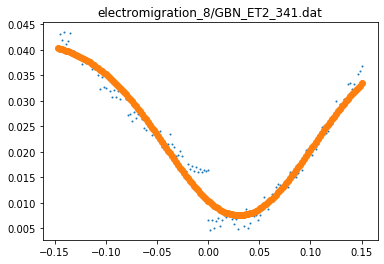

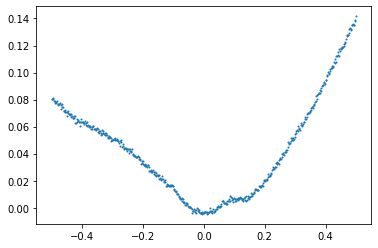

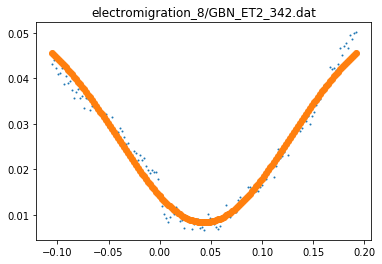

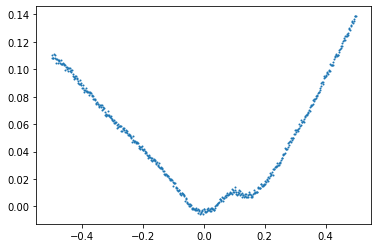

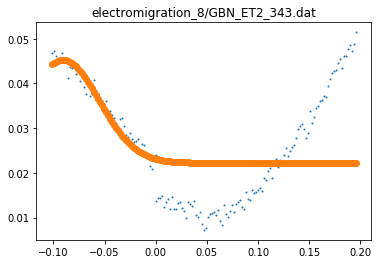

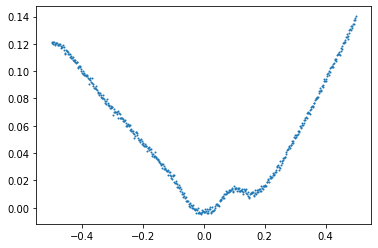

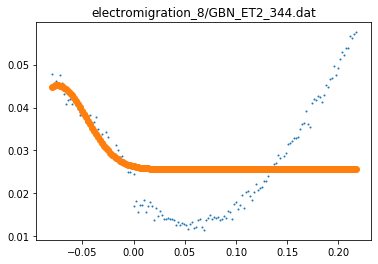

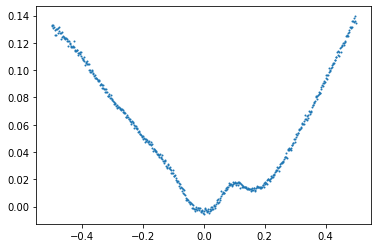

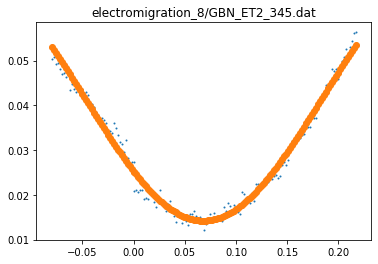

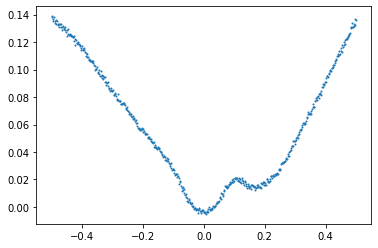

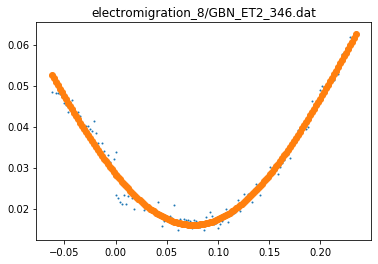

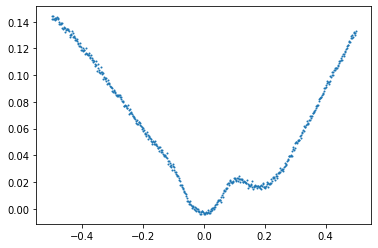

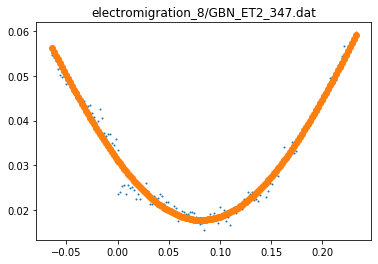

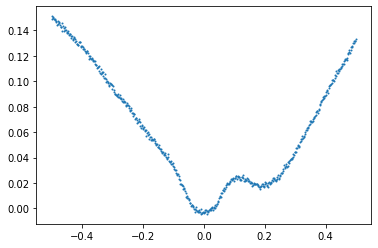

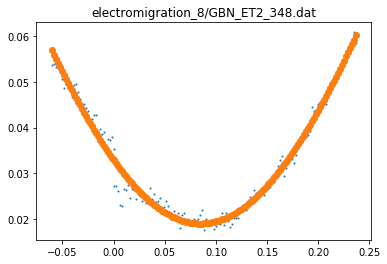

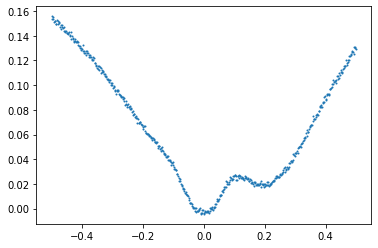

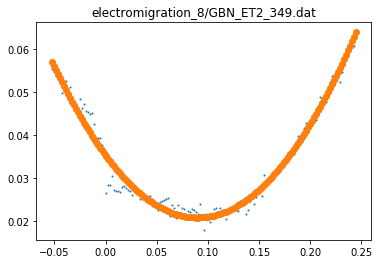

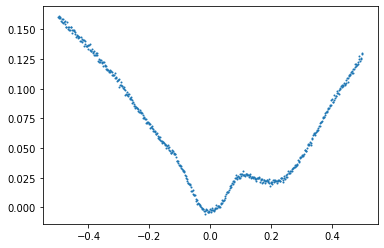

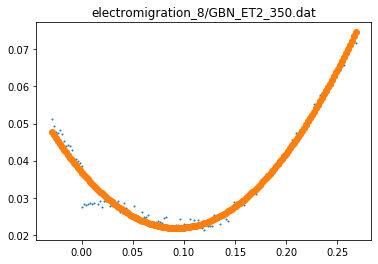

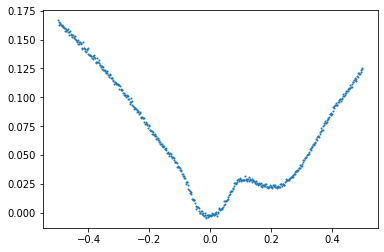

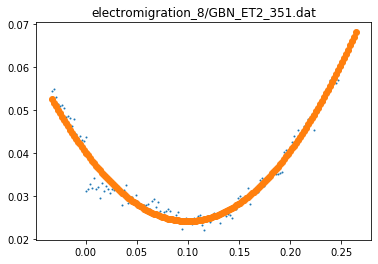

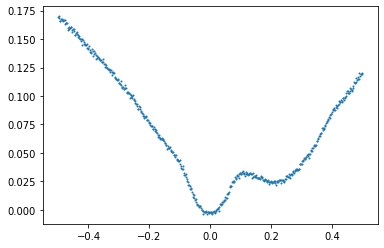

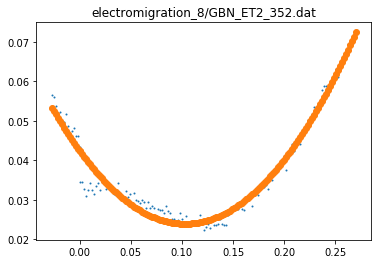

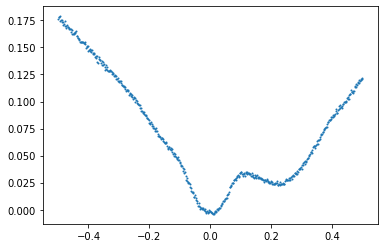

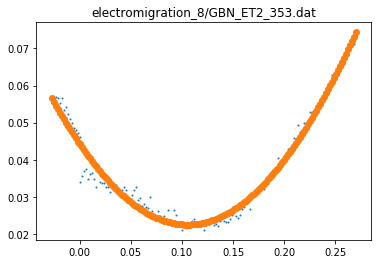

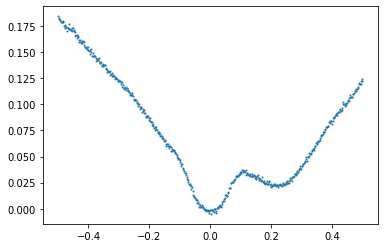

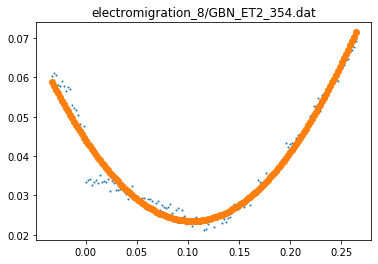

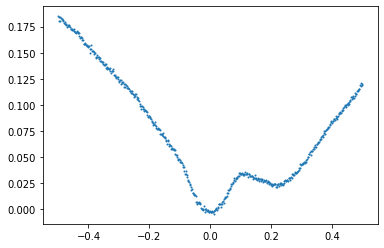

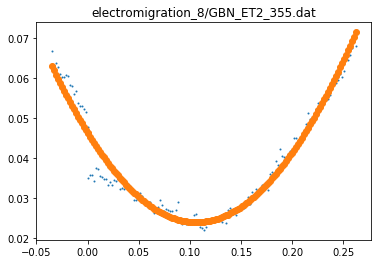

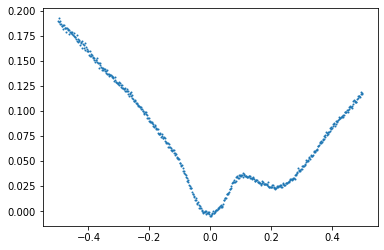

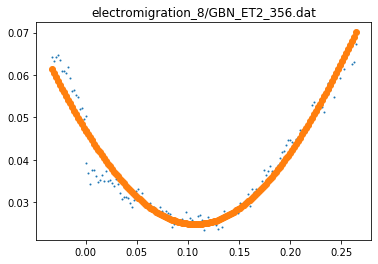

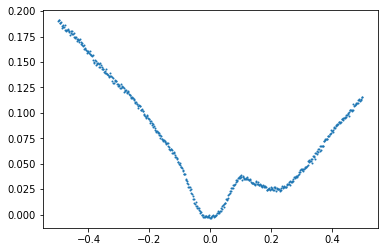

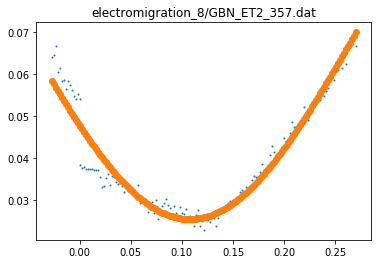

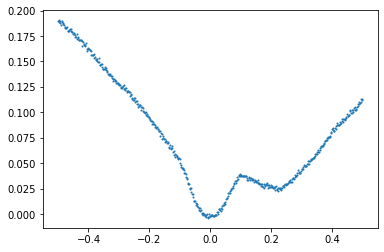

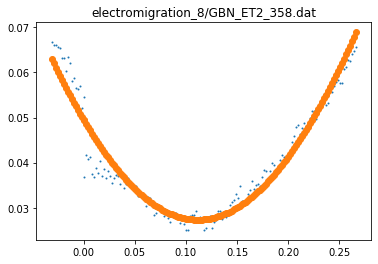

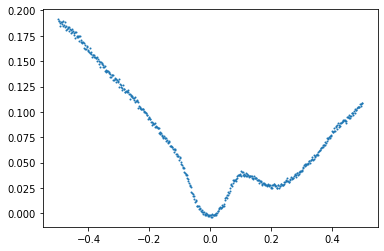

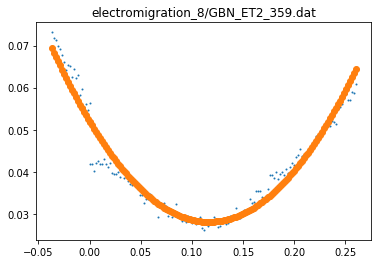

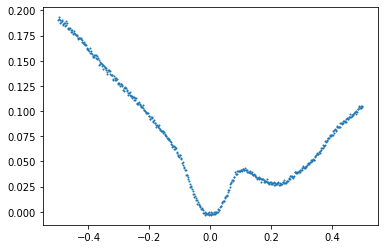

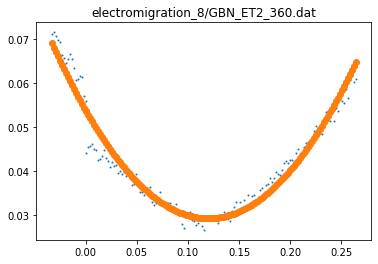

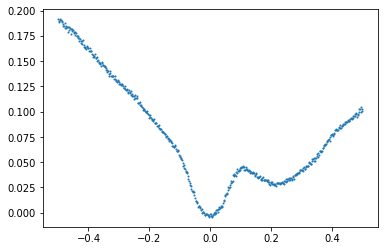

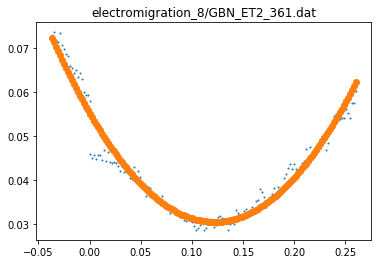

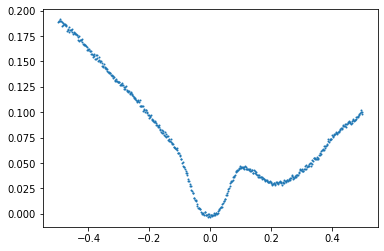

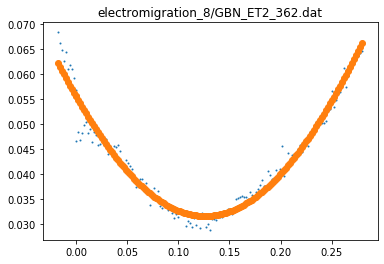

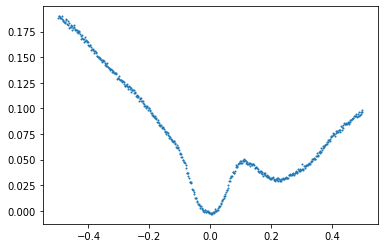

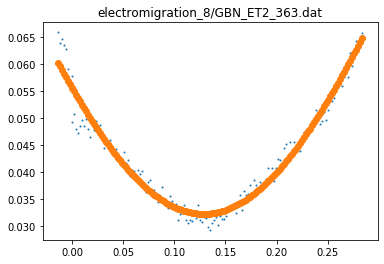

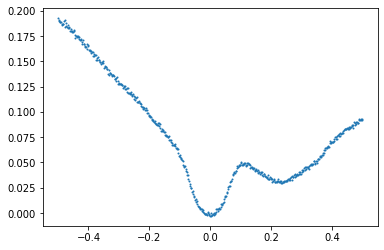

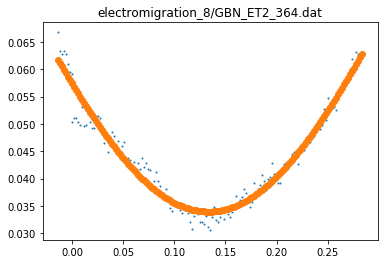

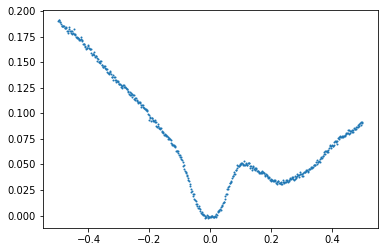

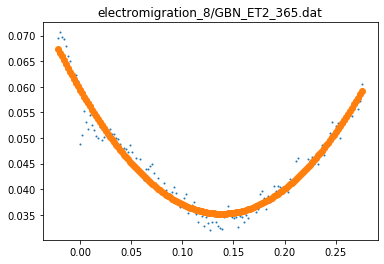

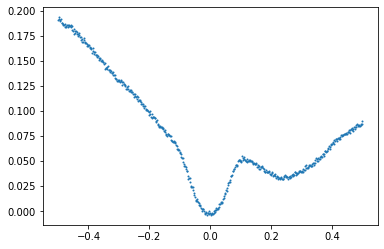

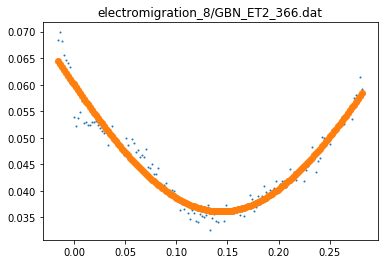

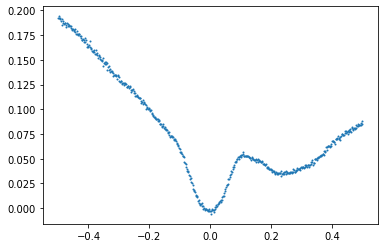

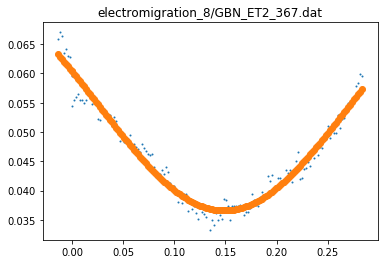

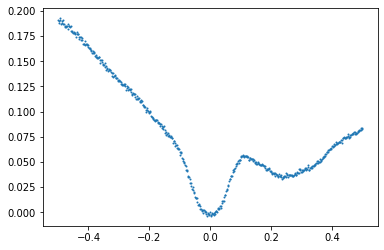

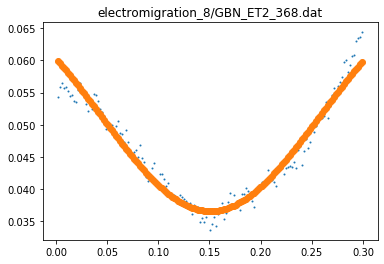

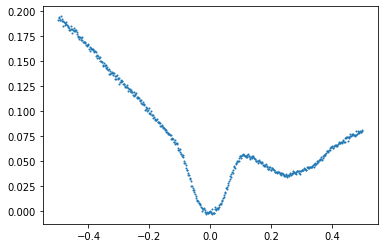

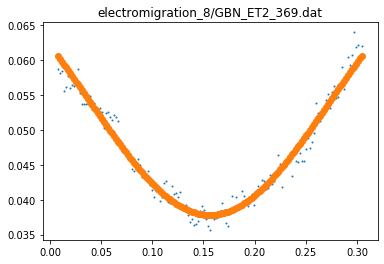

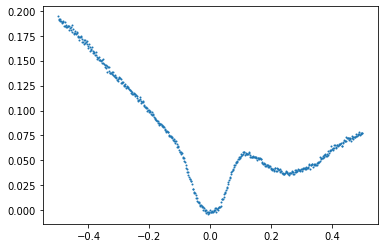

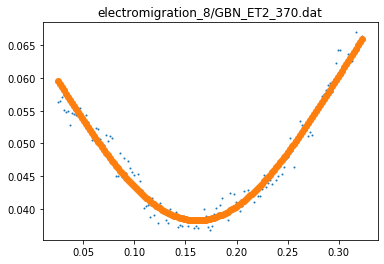

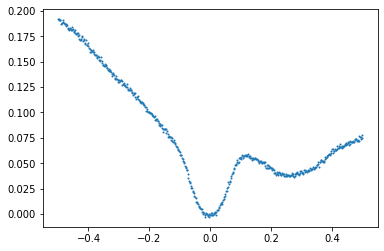

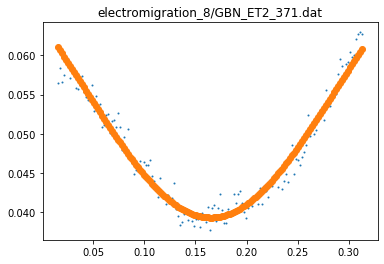

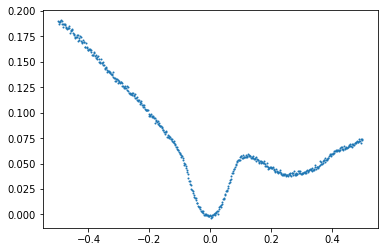

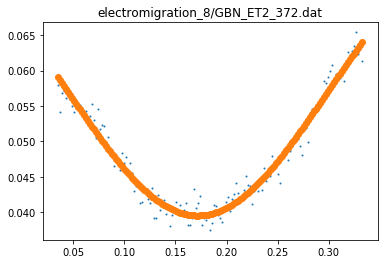

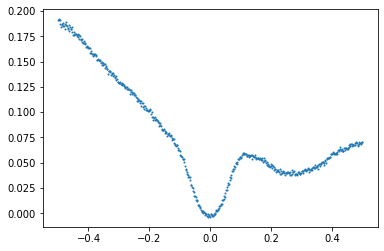

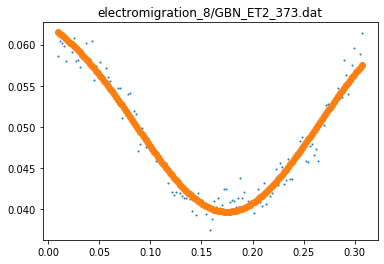

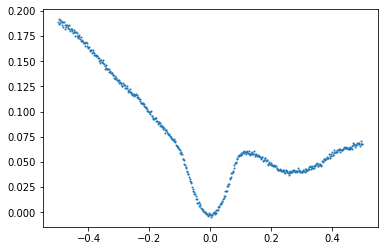

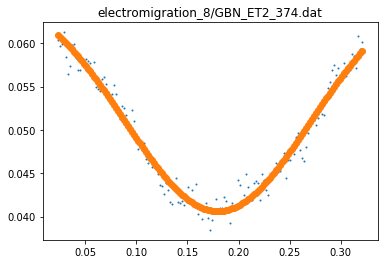

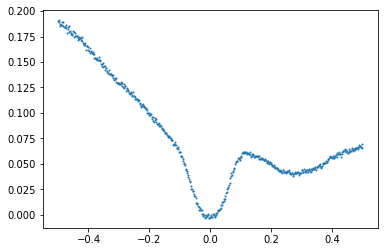

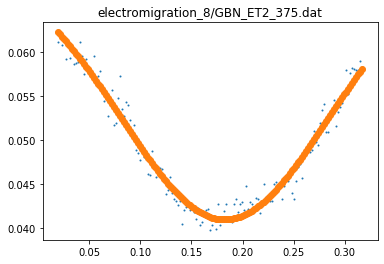

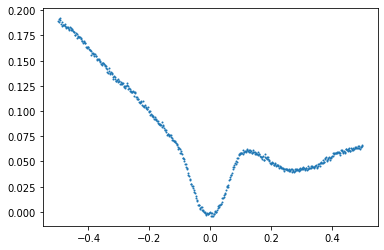

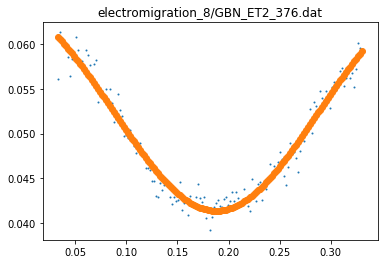

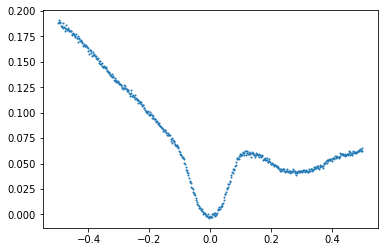

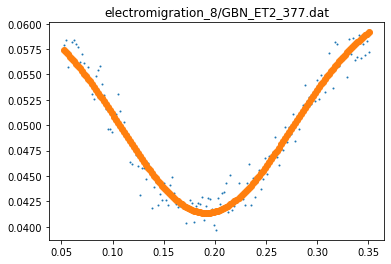

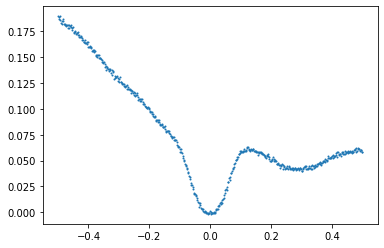

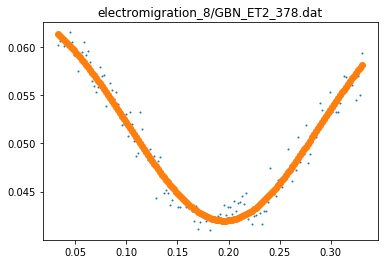

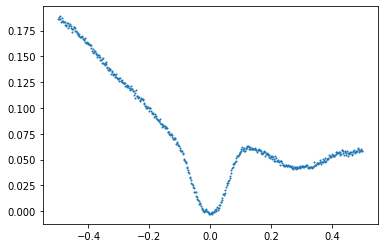

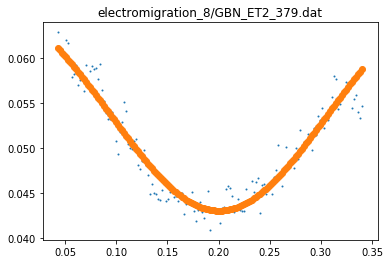

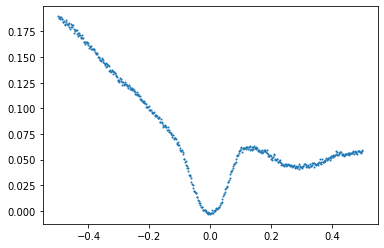

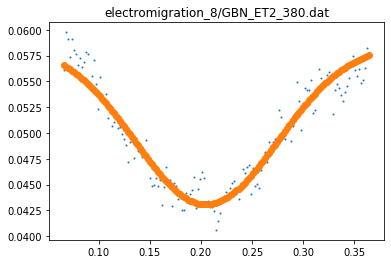

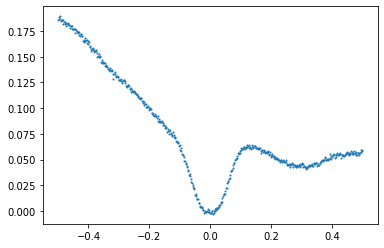

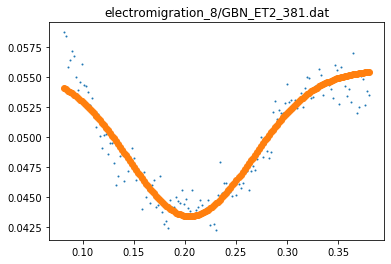

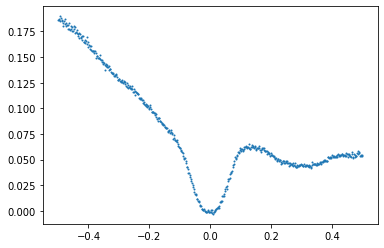

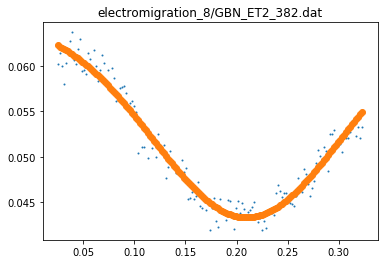

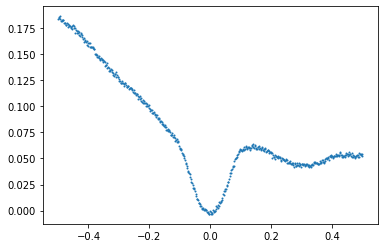

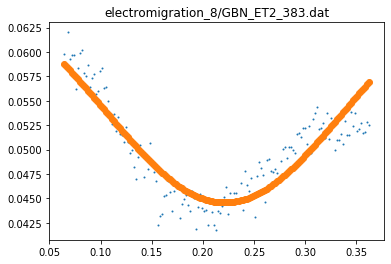

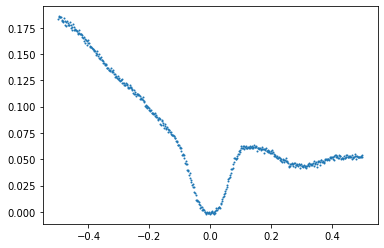

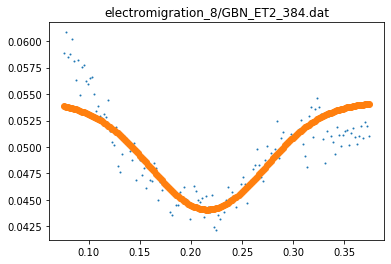

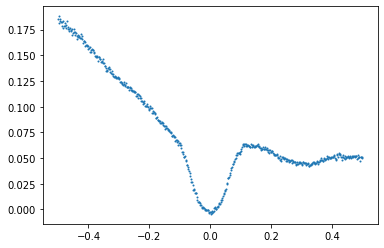

In [150]:
N_RANGE = (324, 385)
files = file_list(N_RANGE)
g = []
for i, f in enumerate(files):
    df = file2df(f)
#     if i < 20:
    g.append(fit_dirac(df, crop=(-0.1, 0.1), fit_window=(-0.15, 0.15), fname=f))
#     else:
#         g.append(fit_dirac(df, crop=(-0.1, 0.1), fit_window=(-0.15, 0.15), fname=f))
    #if i < 15:
    #    g.append(find_min(df, guess=-0.2, sig=8))
    #elif i < 18:
    #    g.append(fit_dirac(df, crop=(-0.02, 0.02), fit_window=(-0.15, 0.15), right=False, fname=f))
    #else:
    #    g.append(find_min(df, guess=0.2, sig=8))

(-0.3, 0.3)

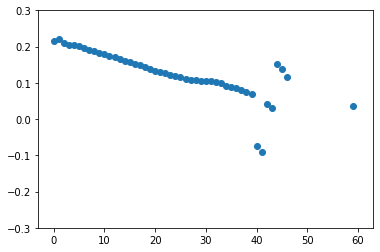

In [151]:
plt.plot(np.array(g[::-1]), 'o')
plt.ylim(-0.3, 0.3)

(-0.1, 0.3)

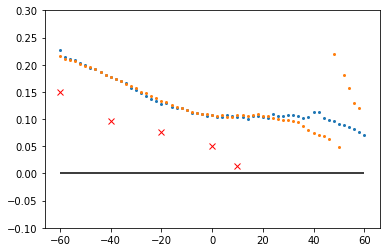

In [155]:
voltages = np.linspace(-60,60,61)
plt.plot(voltages,c[::-1], 'o', markersize=2)
plt.plot(voltages,d[::-1], 'o', markersize=2)
#plt.plot(voltages,e[::-1], 'o', markersize=2)
#plt.plot(voltages,g[::-1], 'o', markersize=2)
#plt.plot(v,h_avg, 'o', markersize=2)
#plt.plot(h, 'o', markersize=1)
plt.plot([-60,-40,-20,0,10],[0.25,0.196,0.176,0.15,0.114]-np.ones(5)*0.1,'rx')
plt.hlines(0,-60,60)
plt.ylim(-0.1,0.3)

In [781]:
PATH = "electromigration_7/GBN_ET2_"
N_RANGE = (8, 83)
file_list = lambda nrange : [PATH + '{0:03}.dat'.format(i) for i in range(*nrange)]

In [782]:
len(files)

61

/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this w

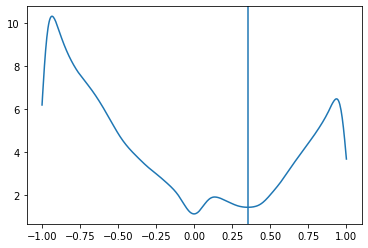

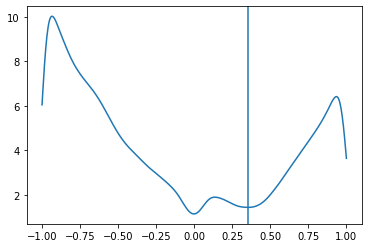

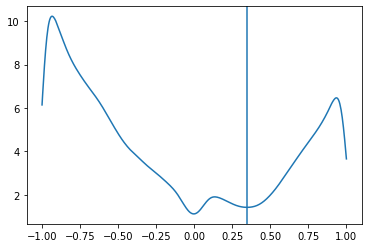

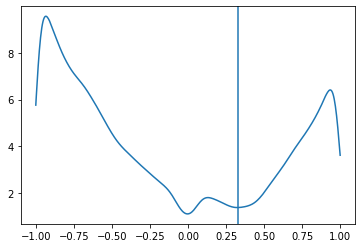

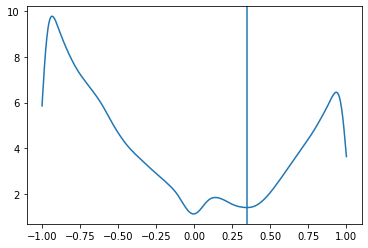

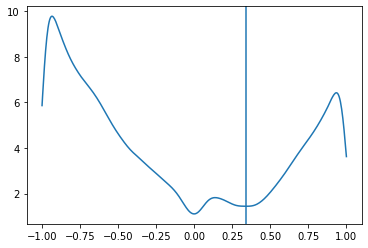

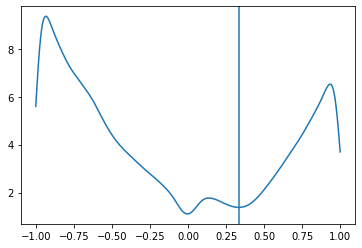

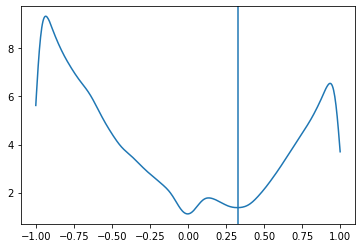

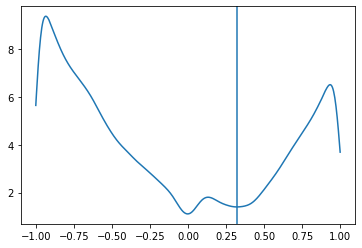

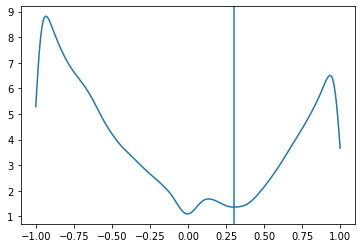

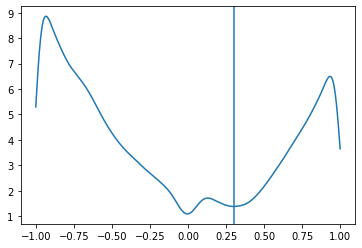

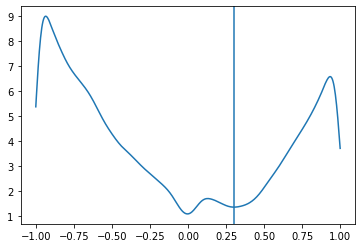

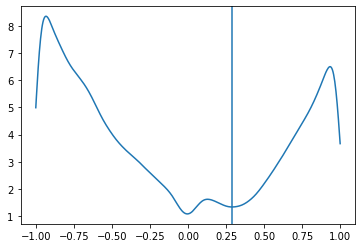

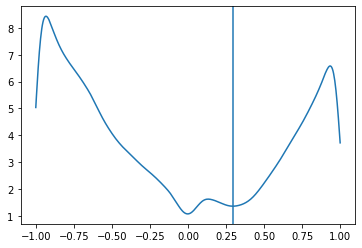

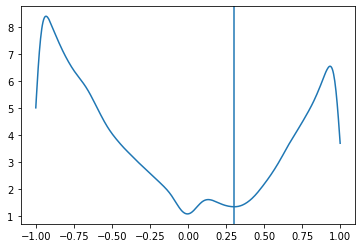

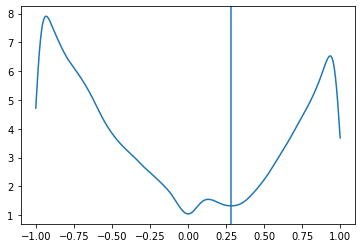

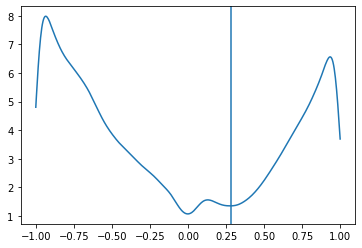

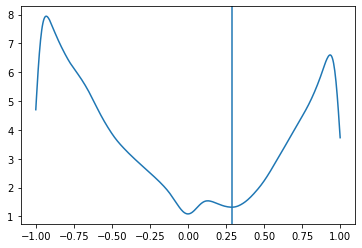

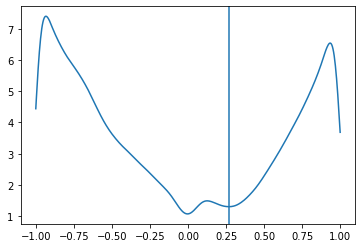

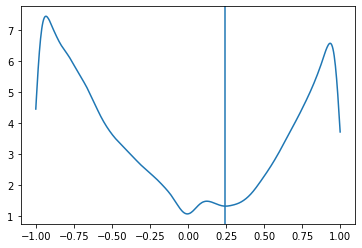

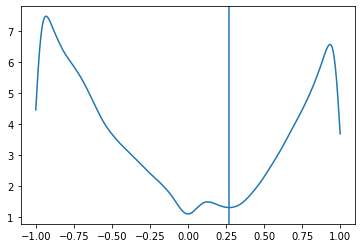

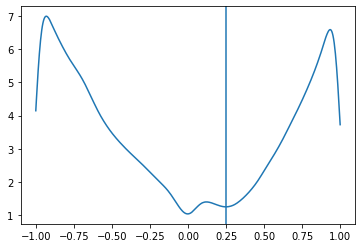

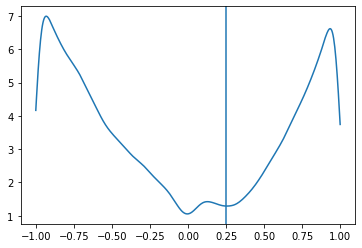

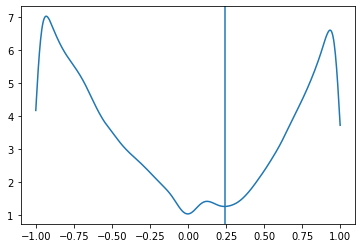

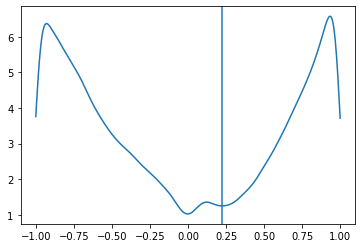

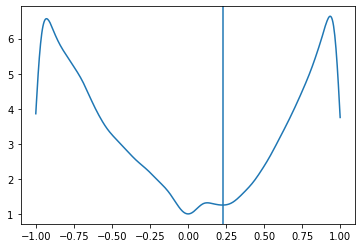

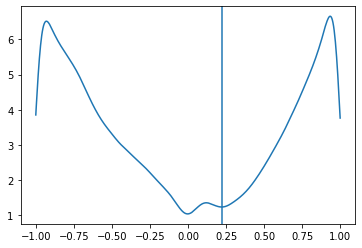

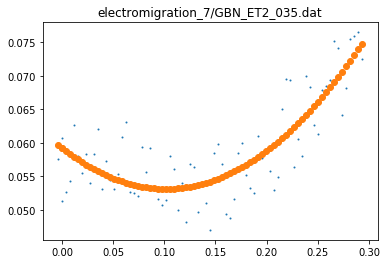

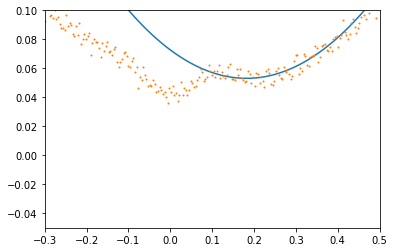

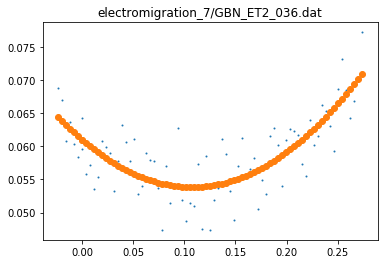

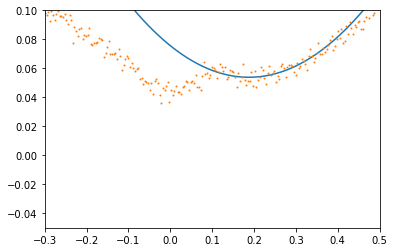

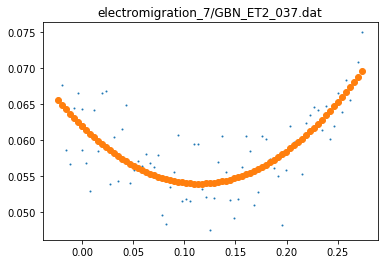

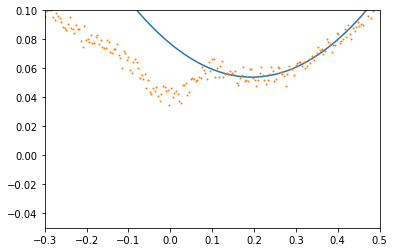

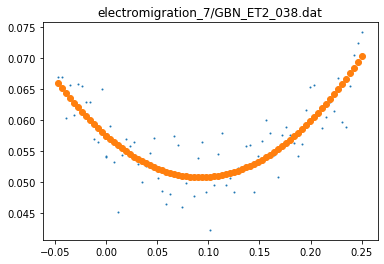

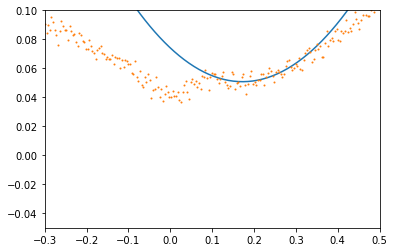

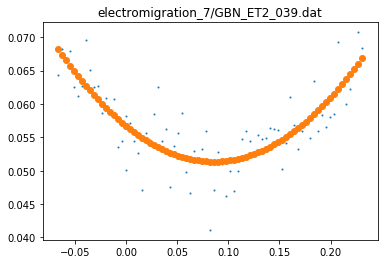

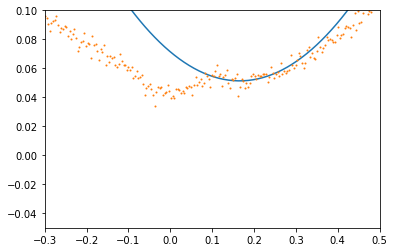

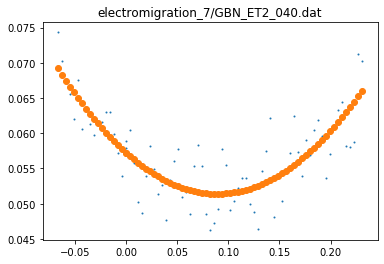

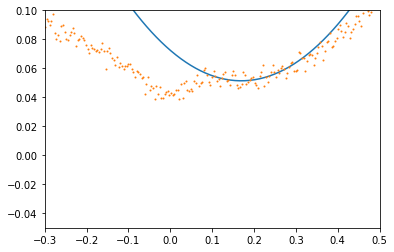

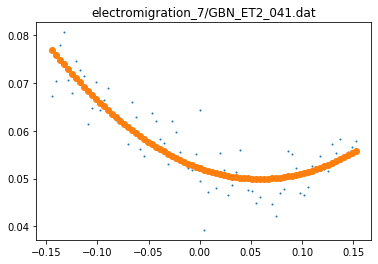

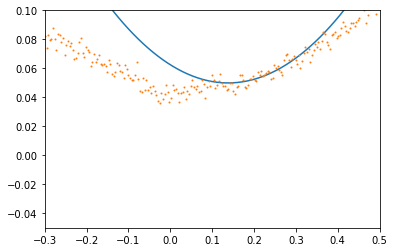

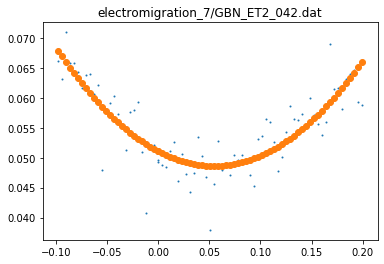

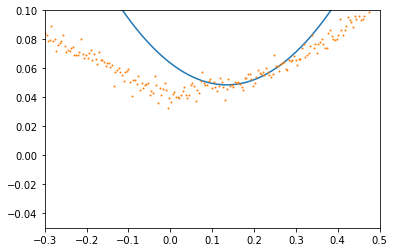

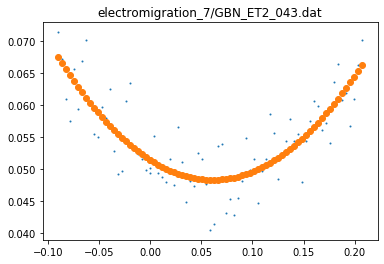

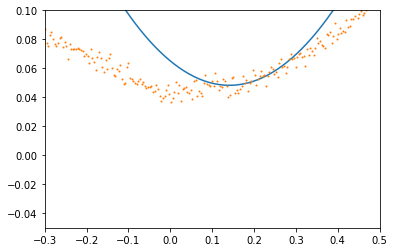

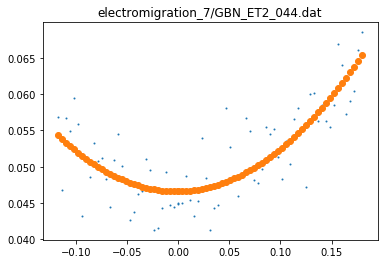

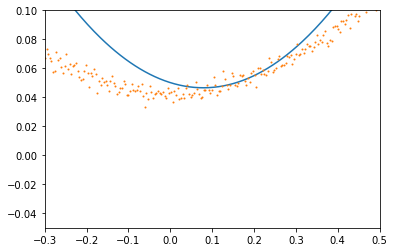

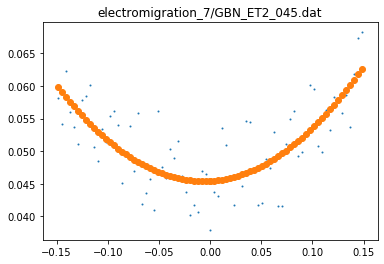

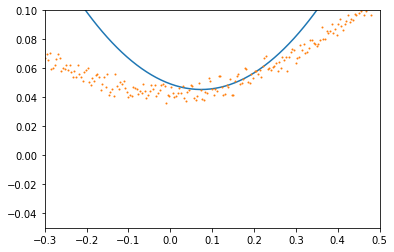

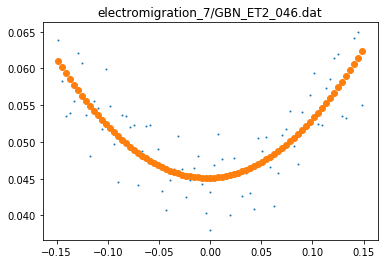

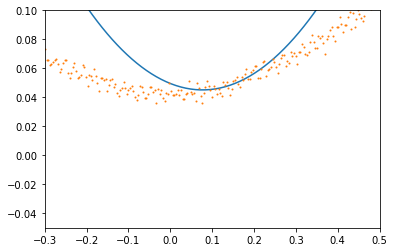

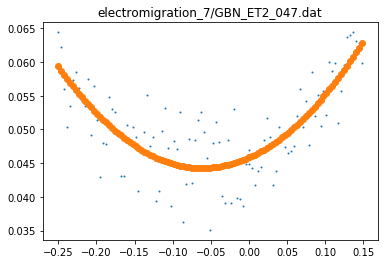

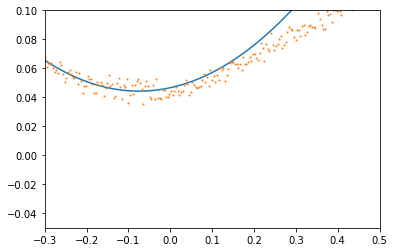

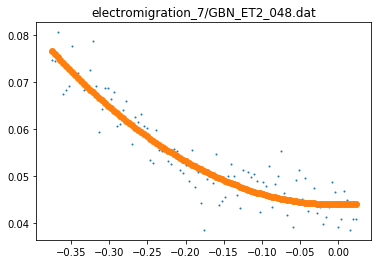

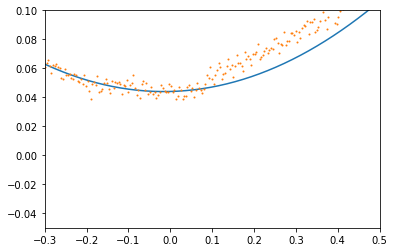

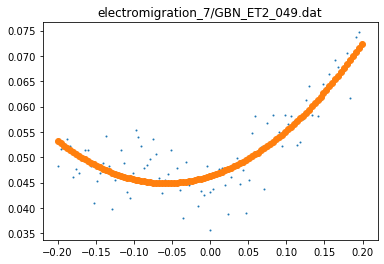

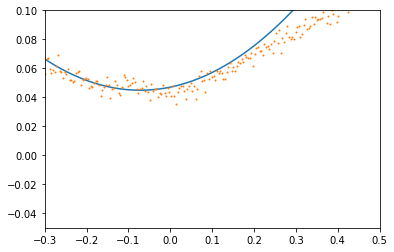

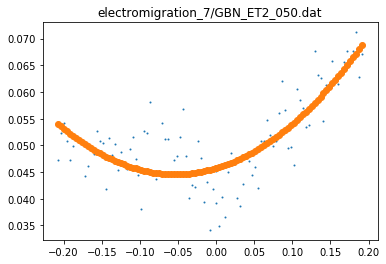

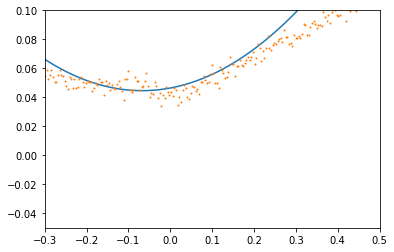

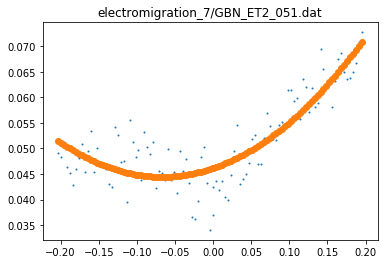

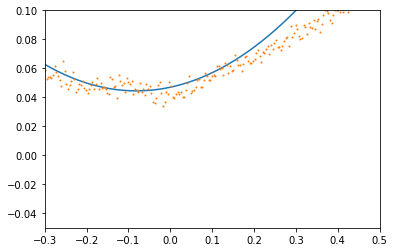

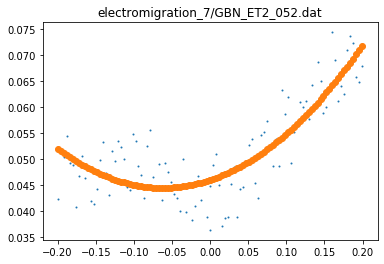

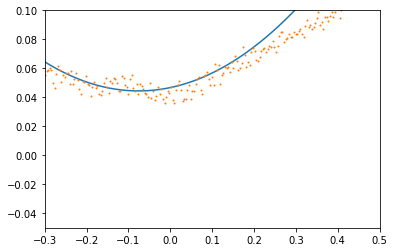

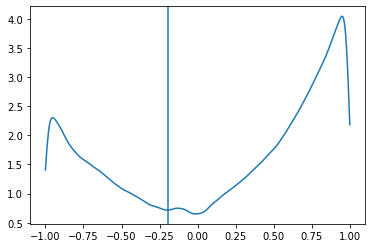

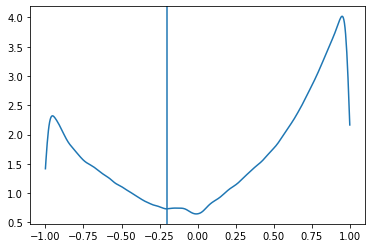

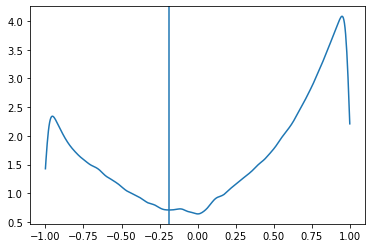

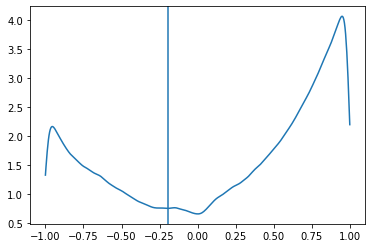

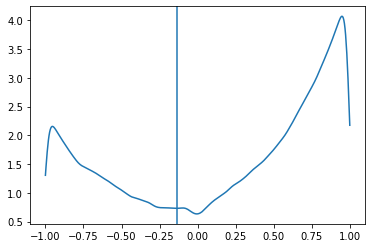

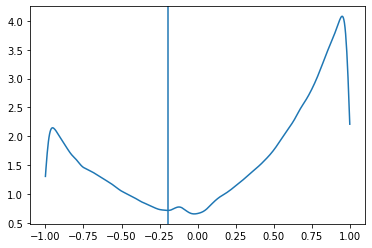

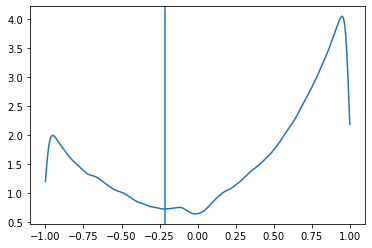

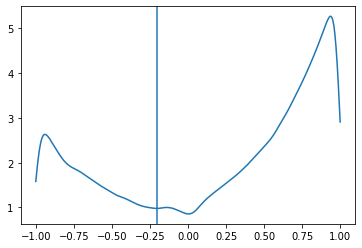

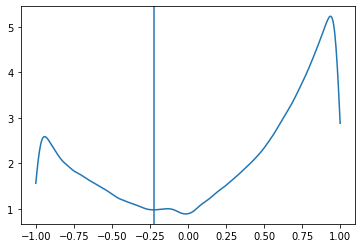

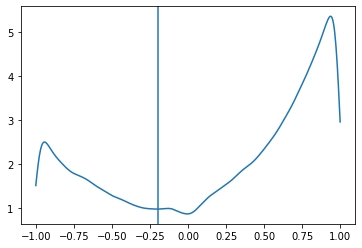

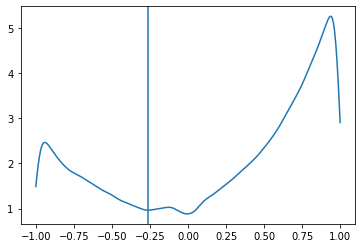

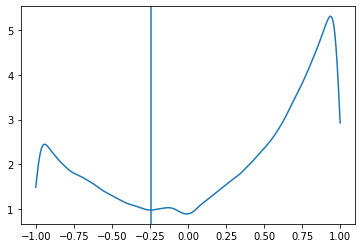

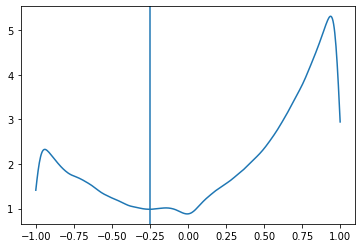

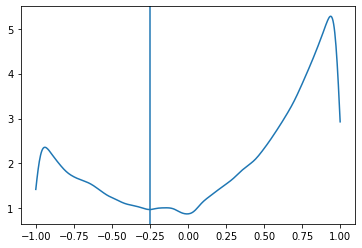

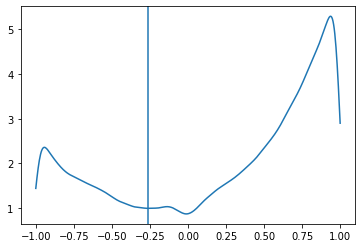

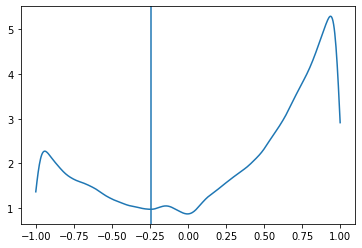

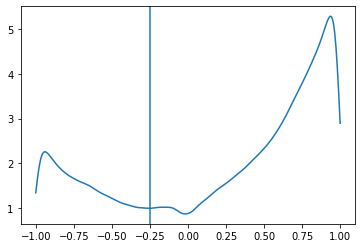

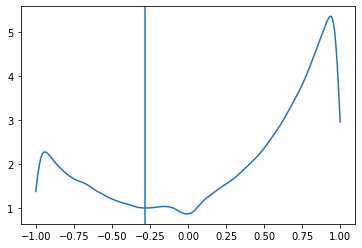

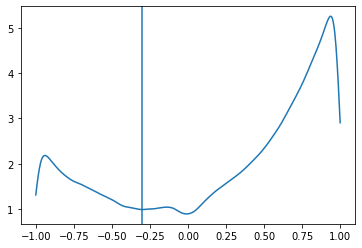

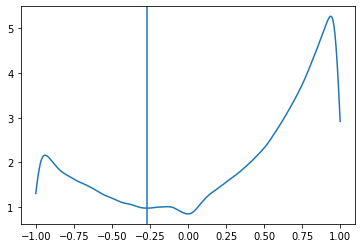

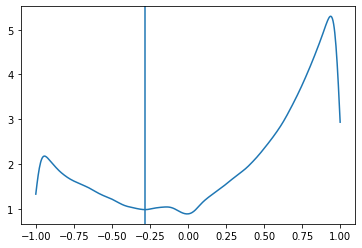

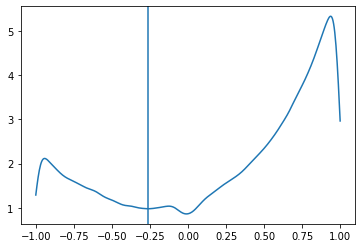

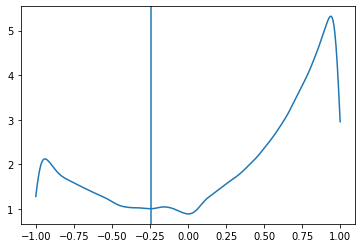

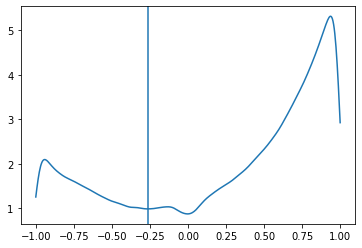

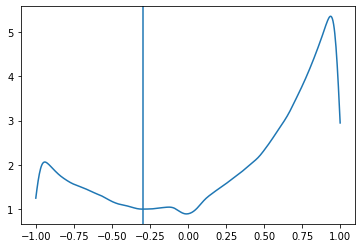

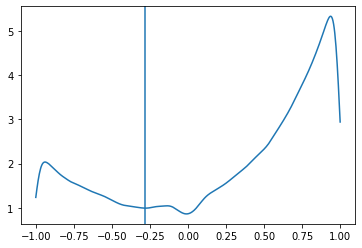

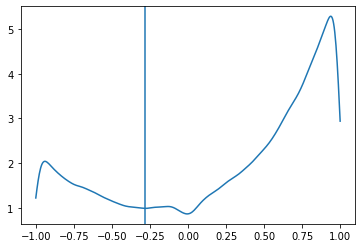

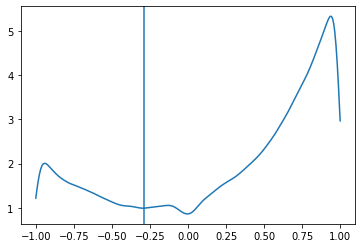

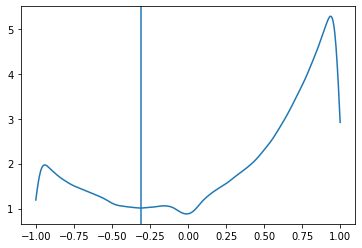

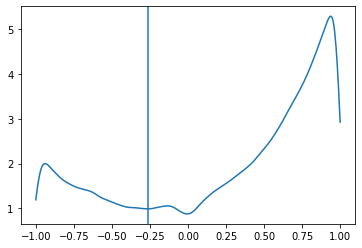

In [783]:
files = file_list(N_RANGE)
h = []
# for f in files:
#     df = file2df(f)
#     h.append(fit_dirac(df, crop=(-0.12, 0.12), fit_window=0.3))
for i, f in enumerate(files):
    df = file2df(f)
    if i < 27:
        h.append(find_min(df, guess=0.2, sig=9, phon_correct=True))
    elif i < 39:
        h.append(fit_dirac(df, crop=(-0.08, 0.08), fit_window=(-0.15, 0.15), right=True, fname=f))
    elif i < 45:
        h.append(fit_dirac(df, crop=(-0.01, 0.01), fit_window=(-0.20, 0.20), right=False, fname=f))
    elif i < 52:
        h.append(find_min(df, guess=-0.15, sig=6, phon_correct=True))
#     else:
#         g.append(fit_dirac(df, crop=(-0.1, 0.1), fit_window=(-0.15, 0.15), fname=f))
#     if i > 40:
#         h.append(find_min(df, guess=-0.2, sig=6, phon_correct=True))
#     elif i > 30:
#         h.append(fit_dirac(df, crop=(-0.01, 0.01), fit_window=(-0.2, 0.2), right=True, fname=f))
#     elif i > 26:
#         h.append(fit_dirac(df, crop=(-0.01, 0.01), fit_window=(-0.2, 0.2), right=False, fname=f))
    else:
        h.append(find_min(df, guess=-0.2, sig=8, phon_correct=False))

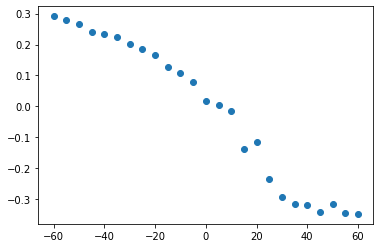

In [784]:
from scipy.ndimage import convolve1d
h_avg = convolve1d(h, weights=[1/3, 1/3, 1/3])[1::3]
v = np.linspace(-60, 60, 25)
plt.plot(v, h_avg, "o")